In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
data = pd.read_csv('mbti_1.csv')
data.head()

type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...

# EDA

In [12]:
from IPython.display import display

# Display the variables and data types in a table format
display(data.dtypes.to_frame().rename(columns={0: "Data Type"}))

# Display the first 5 rows of the dataset
display(data.head())

# Display dataset information
display(data.info())

# Display dataset summary statistics
display(data.describe())

# Display count of missing values in each variable
display(data.isnull().sum().to_frame().rename(columns={0: "Count of Missing Values"}))

Data Type
type     object
posts    object

type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


None

type                                              posts
count   8675                                               8675
unique    16                                               8675
top     INFP  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
freq    1832                                                  1

Count of Missing Values
type                         0
posts                        0

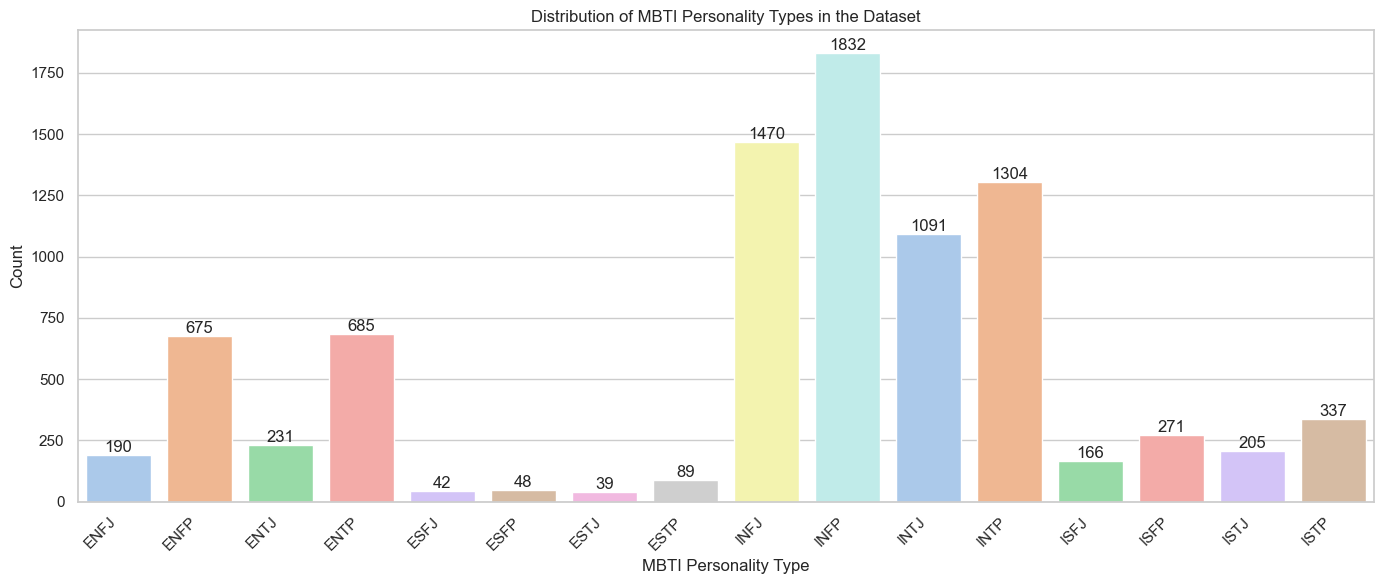

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style and color palette
sns.set(style="whitegrid", palette="pastel")

# Create count plot with interactive features
plt.figure(figsize=(14, 6))
ax = sns.countplot(data=data, x='type', order=sorted(data['type'].unique()), 
                   palette="pastel")
ax.set_title('Distribution of MBTI Personality Types in the Dataset')
ax.set_xlabel('MBTI Personality Type')
ax.set_ylabel('Count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='bottom', fontsize=12)
plt.tight_layout()

# Show interactive plot
plt.show()

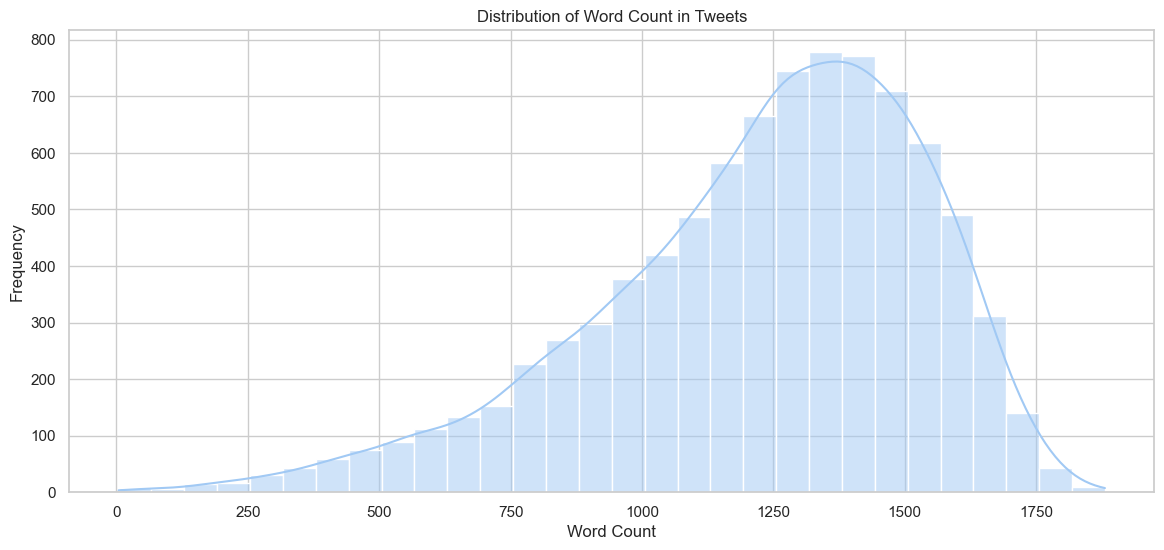

In [15]:
# Add a new column for the word count of each tweet
data['word_count'] = data['posts'].apply(lambda x: len(x.split()))

plt.figure(figsize=(14, 6))
sns.histplot(data=data, x='word_count', bins=30, kde=True)
plt.title('Distribution of Word Count in Tweets')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

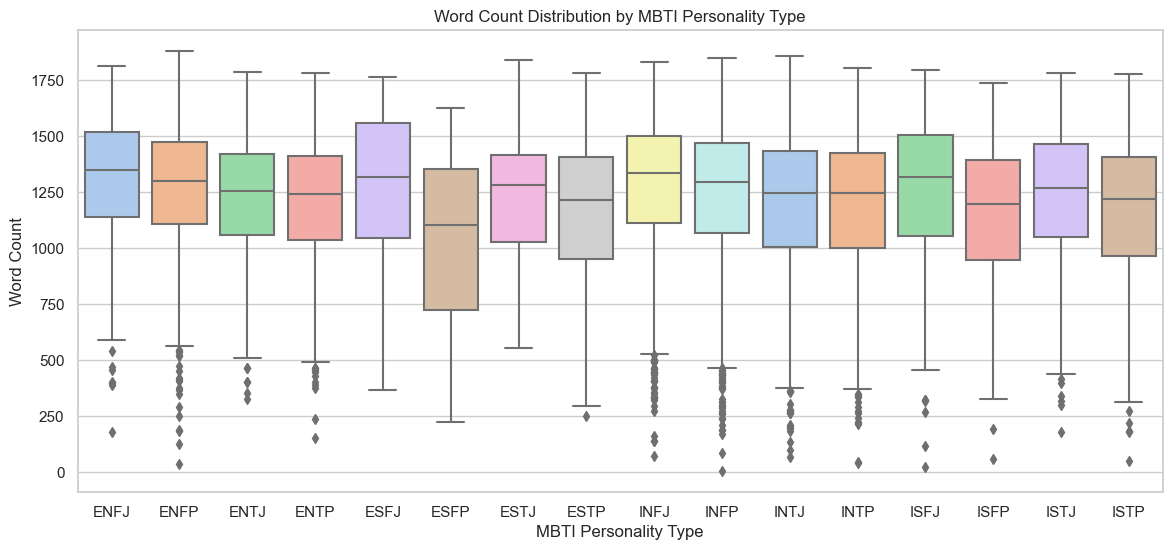

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define color palette
color_palette = sns.color_palette("pastel")

# Create box plot with pastel colors and interactivity
plt.figure(figsize=(14, 6))
ax = sns.boxplot(data=data, x='type', y='word_count', 
                 order=sorted(data['type'].unique()), 
                 palette=color_palette)
ax.set_title('Word Count Distribution by MBTI Personality Type')
ax.set_xlabel('MBTI Personality Type')
ax.set_ylabel('Word Count')
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .7))

# Show interactive plot
plt.show()

In [4]:
import pandas as pd
import plotly.express as px

# Define color palette
color_palette = px.colors.qualitative.Pastel

# Get value counts for each personality type
label_counts = data["type"].value_counts()

# Create pie chart with pastel colors
fig = px.pie(names=label_counts.index, values=label_counts.values, 
             title="Distribution of MBTI Personality Types in the Dataset",
             color_discrete_sequence=color_palette)

# Update chart labels and font
fig.update_traces(textposition="inside", textinfo="percent+label", 
                  marker=dict(line=dict(color="#000000", width=1)))
fig.update_layout(title_font=dict(size=24, color="darkblue"),
                  legend=dict(title="MBTI Personality Type", 
                              font=dict(size=12, color="black")),
                  font=dict(size=12, color="black"))

# Show interactive plot
fig.show()

In [6]:
import plotly.express as px

# Define color palette
color_palette = px.colors.qualitative.Pastel

# Calculate word count for each tweet
data['word_count'] = data['posts'].apply(lambda x: len(x.split()))

# Create violin plot with pastel colors
fig = px.violin(data, y="word_count", box=True, points="all", 
                title="Distribution of Word Count in PersonalityCafe",
                color_discrete_sequence=color_palette)
fig.update_yaxes(title="Word Count")
fig.update_xaxes(title="Frequency")

# Show interactive plot
fig.show()


# TF-IDF

In [7]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Split the DataFrame into train and test sets
train_data, test_data = train_test_split(data, test_size=0.1, random_state=42)

# Encode the labels using LabelEncoder
le = LabelEncoder()
le.fit(data['type'].unique())
train_data['type'] = le.transform(train_data['type'])
test_data['type'] = le.transform(test_data['type'])

# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

# Fit and transform the text data
X_train = vectorizer.fit_transform(train_data['posts'])
X_test = vectorizer.transform(test_data['posts'])

# Get the feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out() 

# Create a DataFrame from the feature names and their corresponding TF-IDF scores
tfidf_scores = pd.DataFrame(X_train.toarray(), columns=feature_names)

# Group the data by label and calculate the mean of each feature for each label
mean_tfidf_by_label = tfidf_scores.groupby(train_data['type']).mean()

# Display the top 10 features for each label
for idx, row in mean_tfidf_by_label.iterrows():
    label_idx = int(idx)
    label = le.inverse_transform([label_idx])[0]
    print(f"Top 10 features for label {label}:")
    print(row.nlargest(10))
    print("\n")

Top 10 features for label ENFJ:
like      0.130796
just      0.101740
don       0.098322
think     0.094192
people    0.088301
ve        0.073598
know      0.070677
really    0.066745
com       0.057376
time      0.049348
Name: 0.0, dtype: float64


Top 10 features for label ENFP:
like      0.126000
just      0.102980
people    0.095108
don       0.094873
think     0.093678
ve        0.076021
know      0.071725
really    0.069918
com       0.060504
time      0.057024
Name: 1.0, dtype: float64


Top 10 features for label ENTJ:
like       0.123745
just       0.100780
think      0.097536
don        0.095913
people     0.092878
know       0.072595
ve         0.072022
really     0.070036
com        0.067972
youtube    0.055451
Name: 2.0, dtype: float64


Top 10 features for label ENTP:
like      0.123798
just      0.103250
don       0.093244
think     0.089505
people    0.089465
com       0.070387
know      0.069447
ve        0.068252
really    0.067278
http      0.056292
Name: 3.0, dtype: 

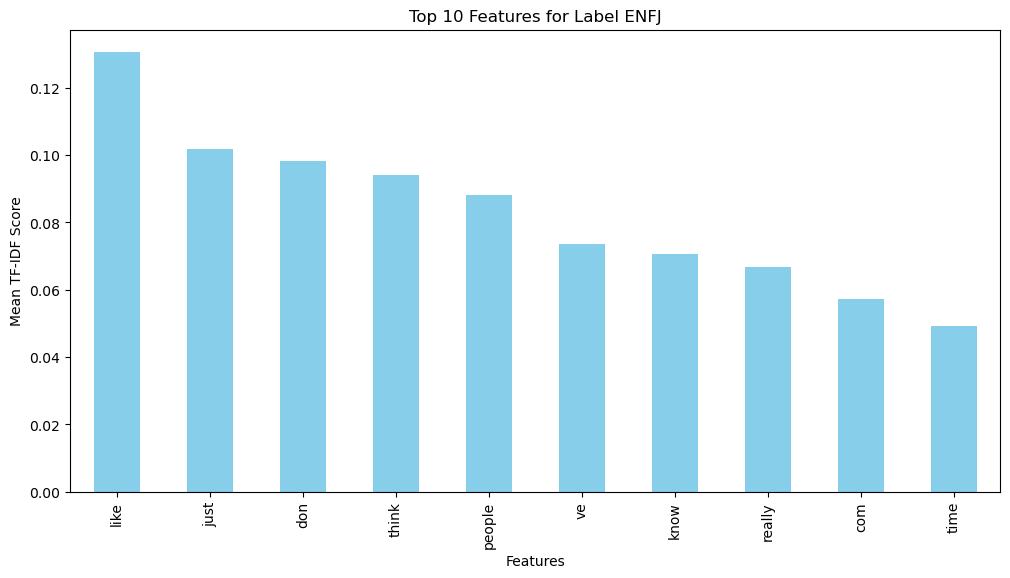

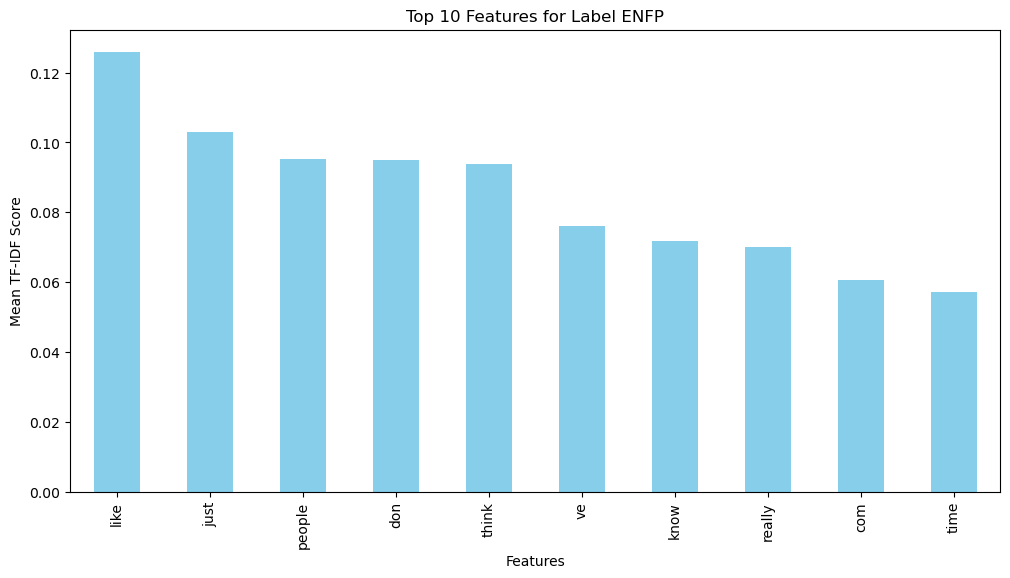

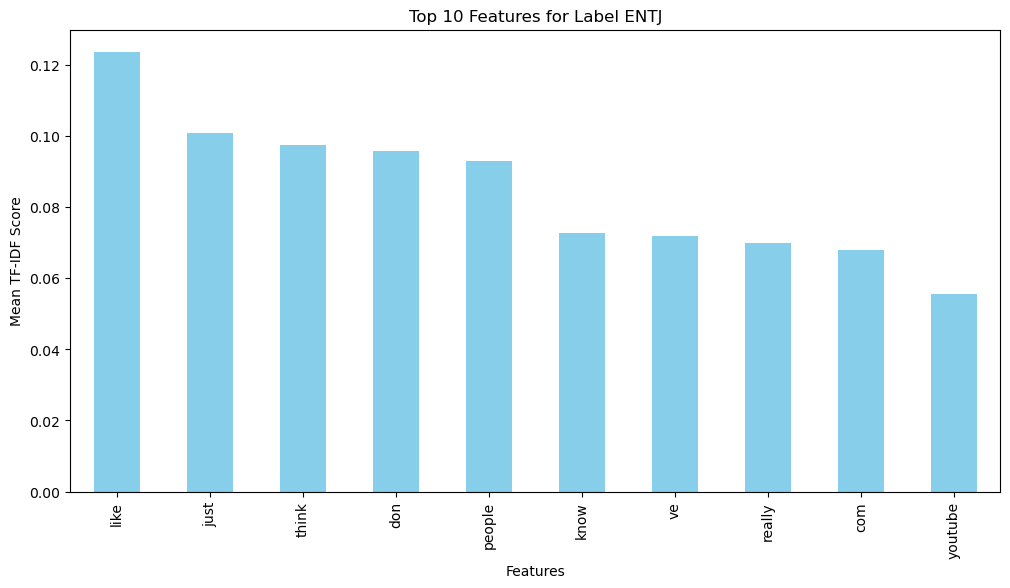

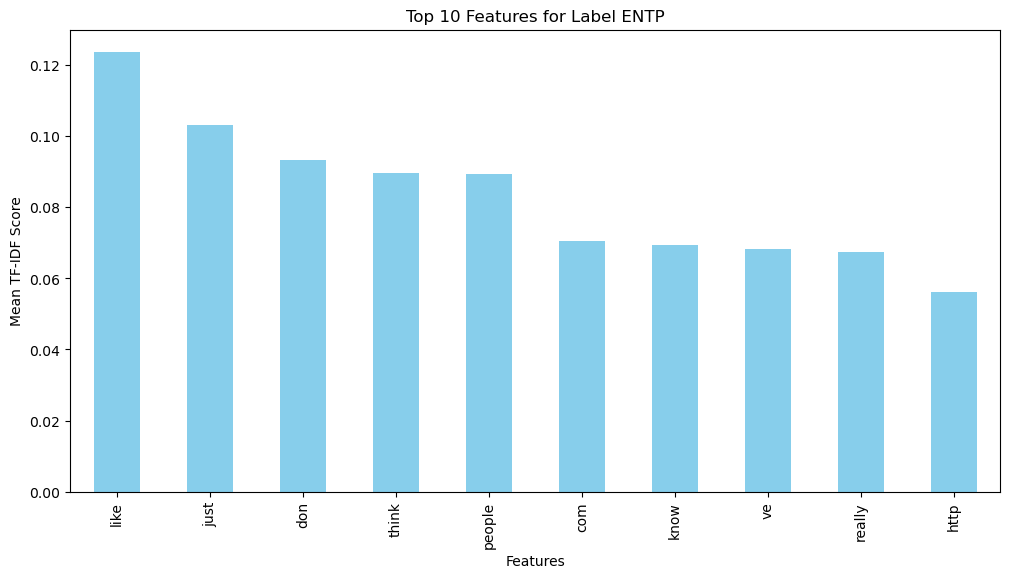

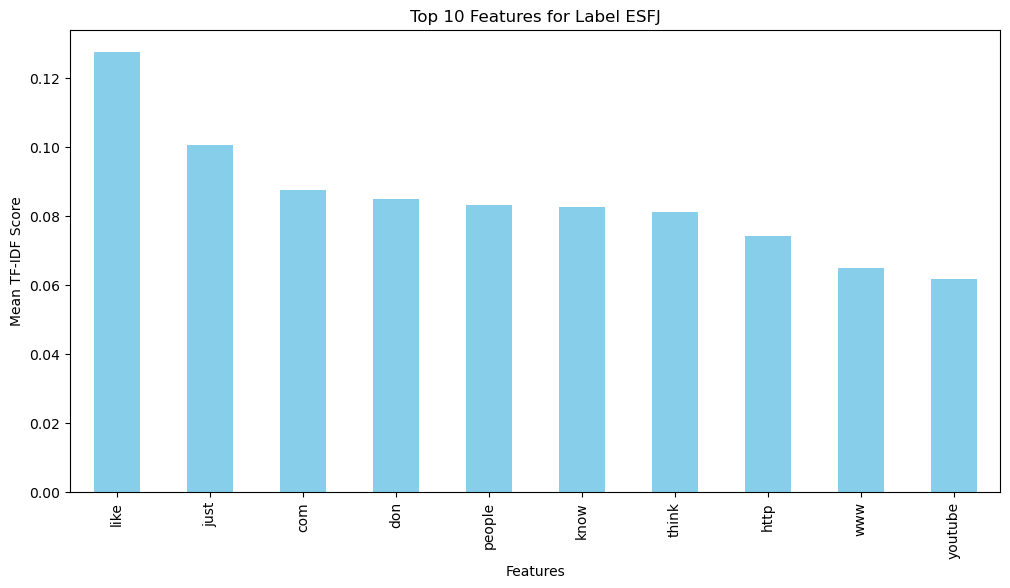

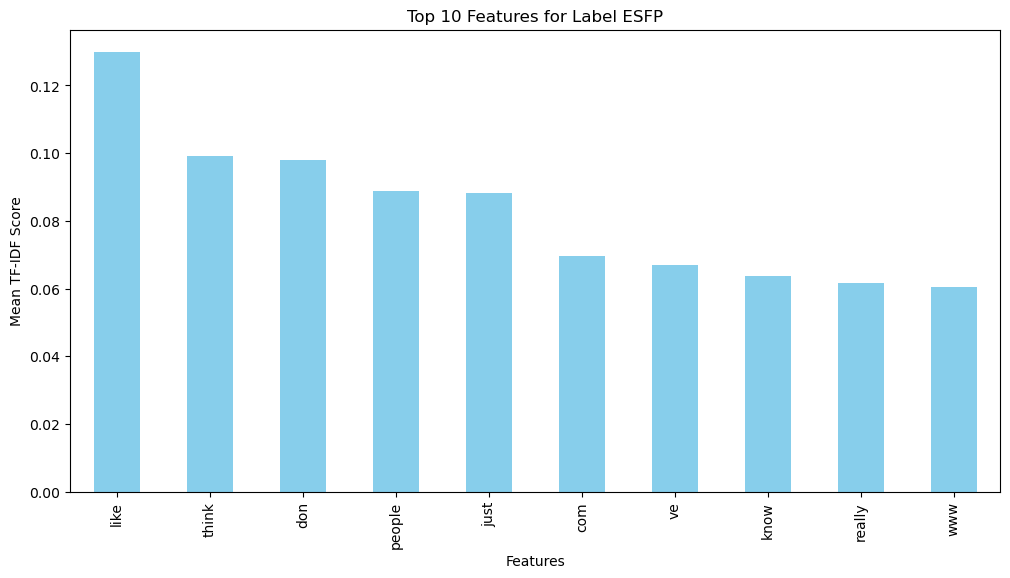

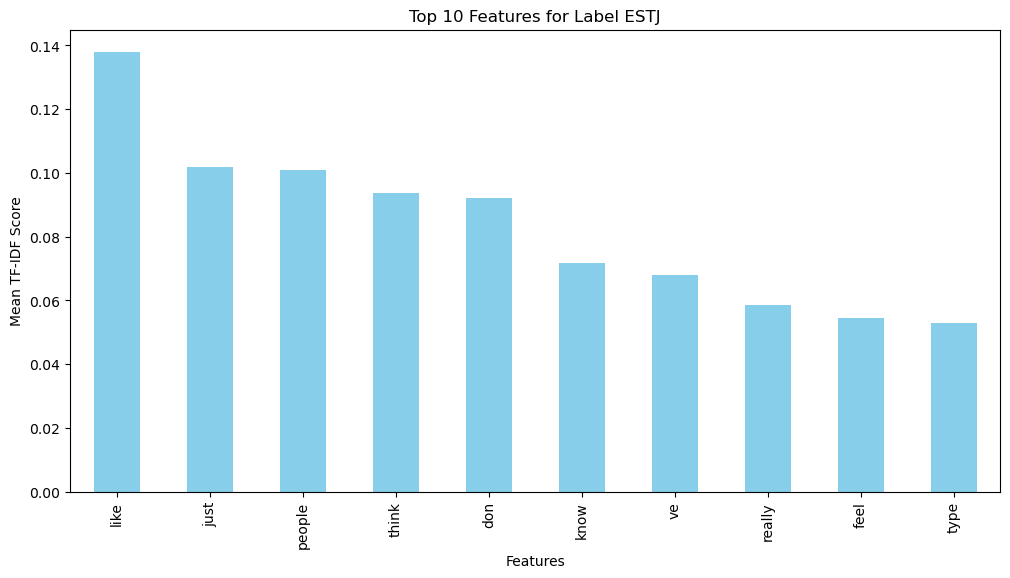

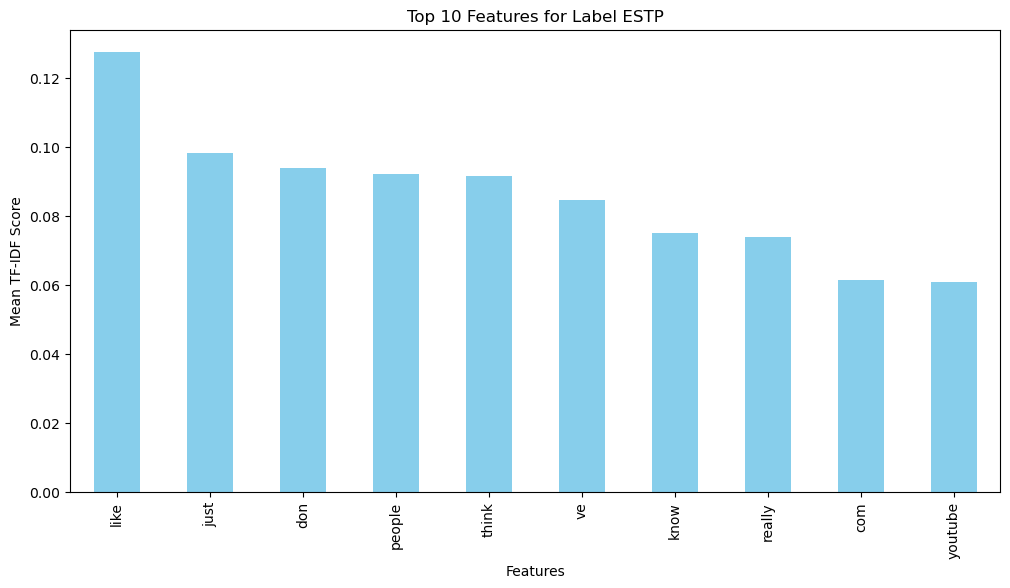

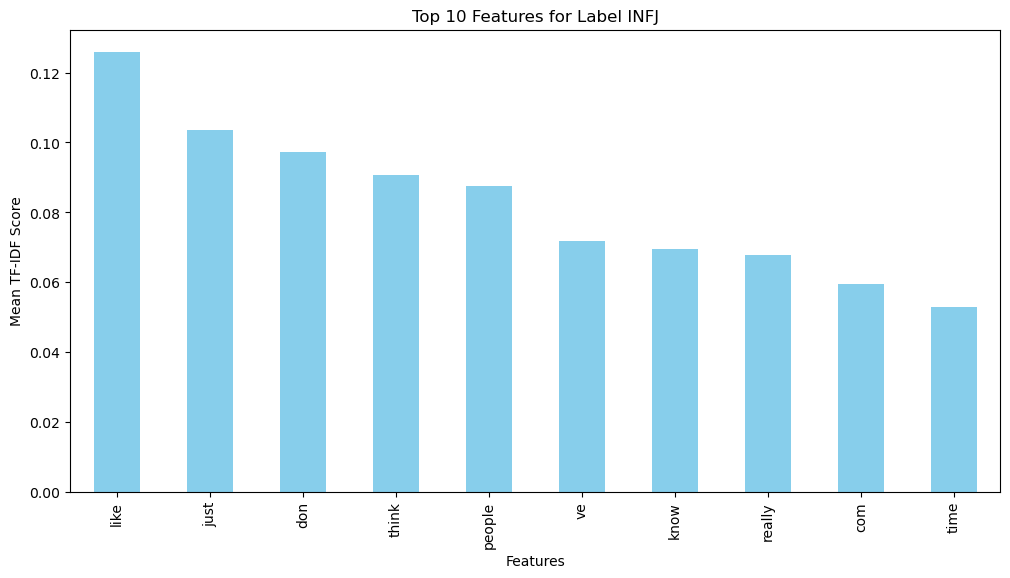

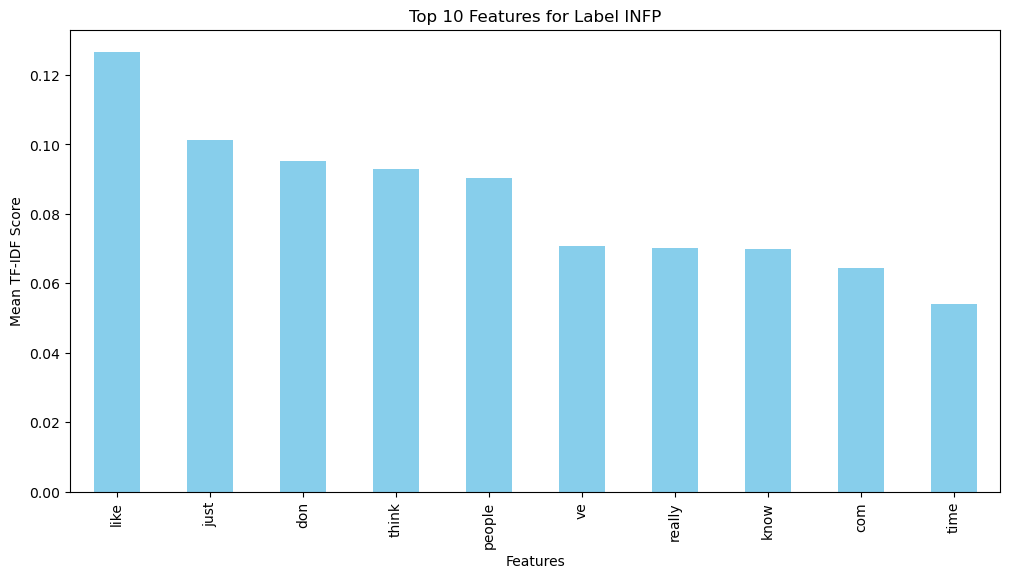

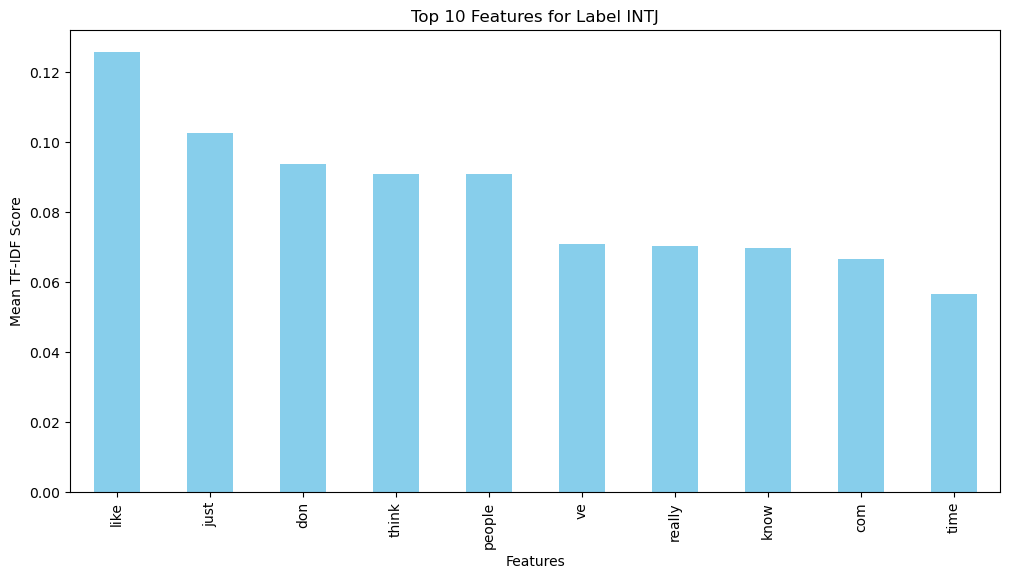

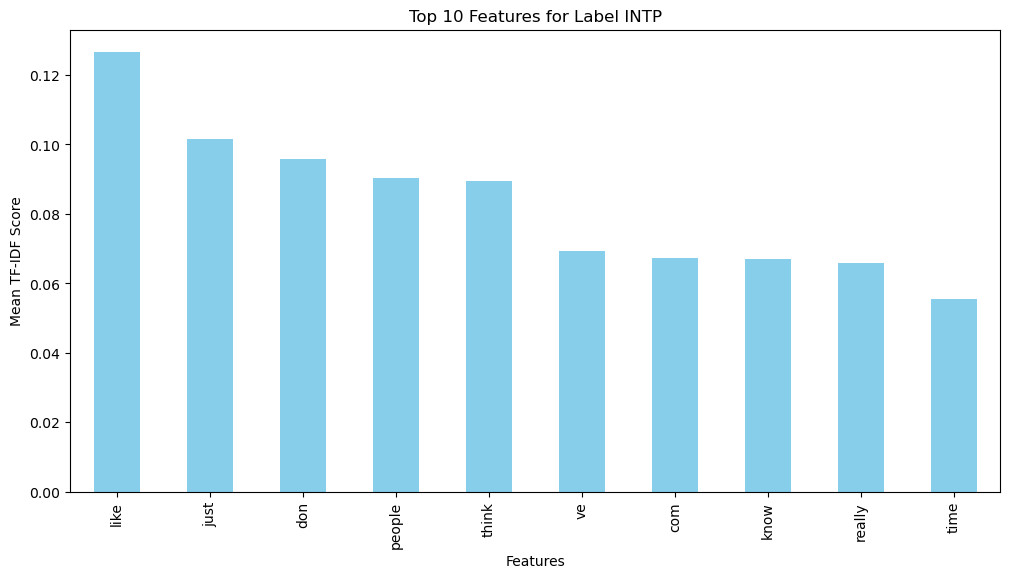

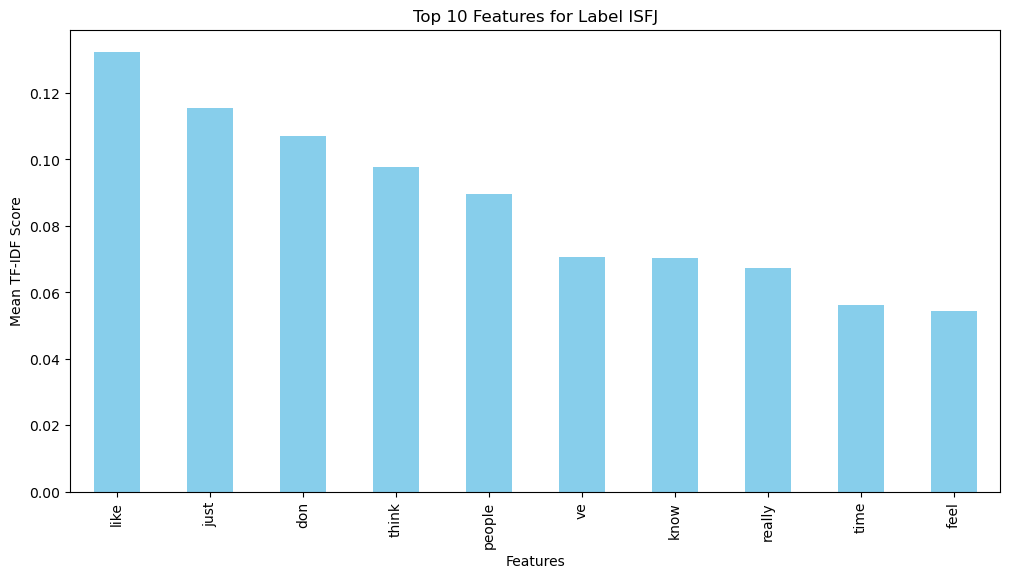

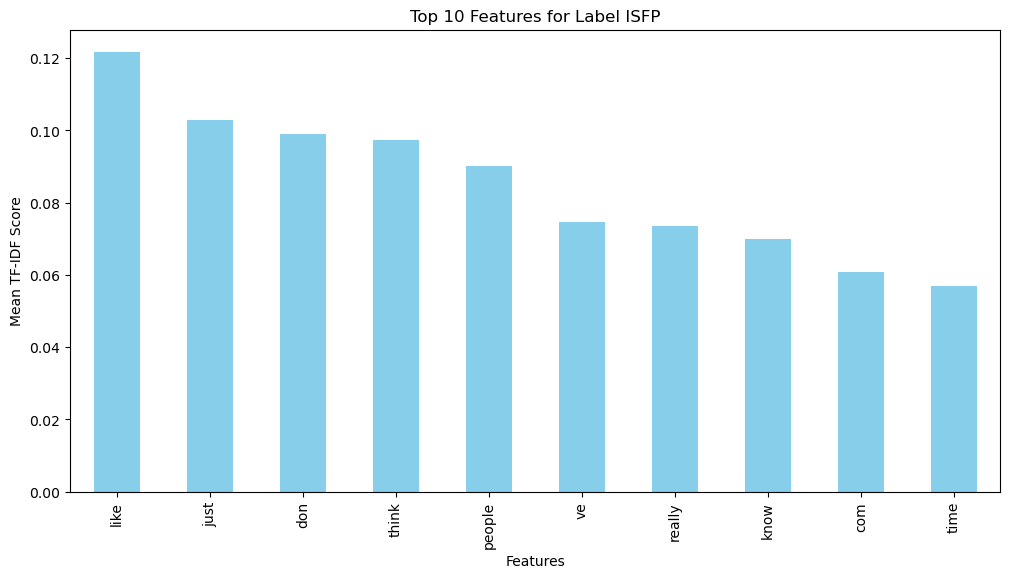

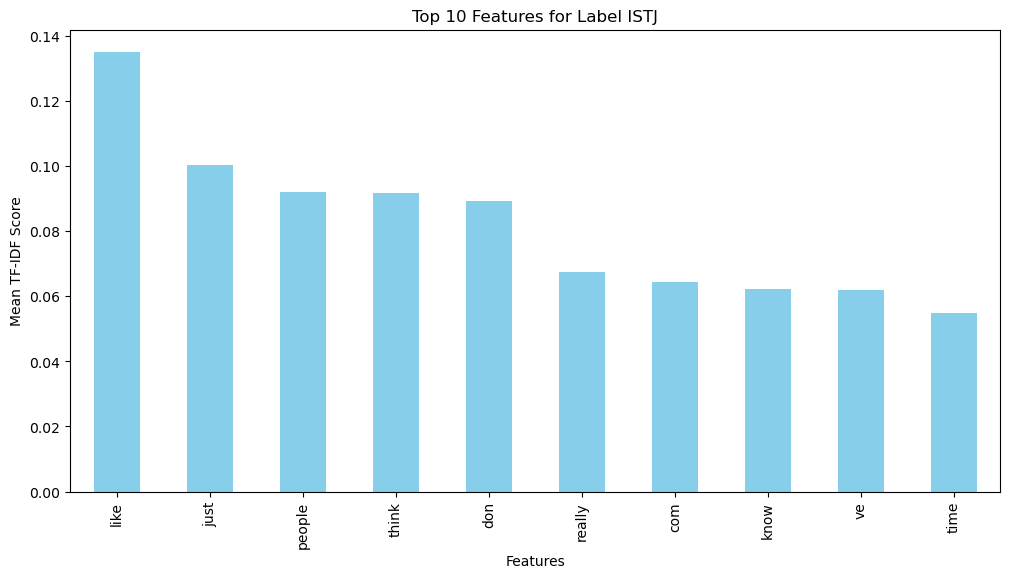

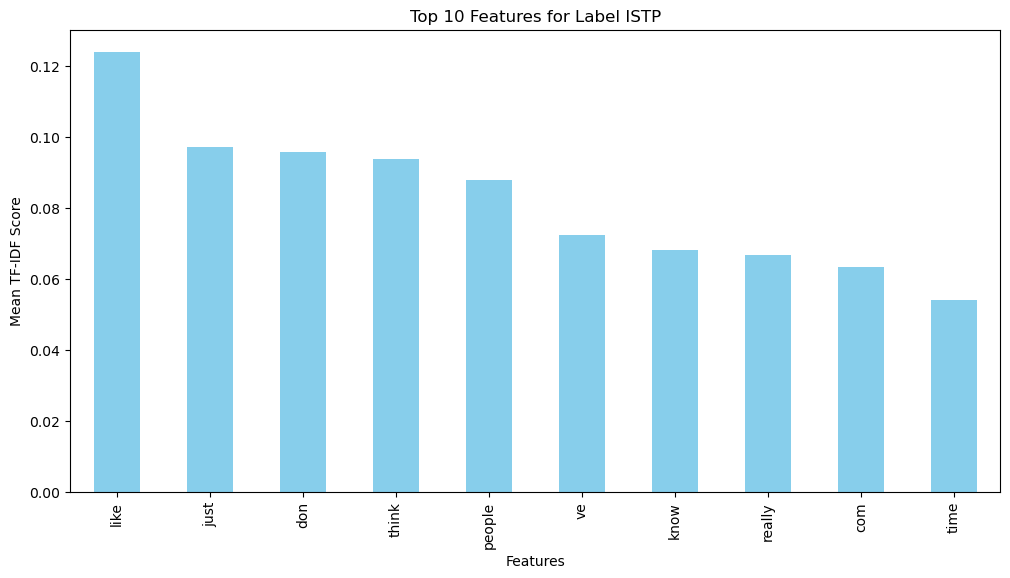

In [8]:
import matplotlib.pyplot as plt

def plot_top_features(row, label):
    plt.figure(figsize=(12, 6))
    row.nlargest(10).plot(kind='bar', color='skyblue')
    plt.title(f"Top 10 Features for Label {label}")
    plt.xlabel("Features")
    plt.ylabel("Mean TF-IDF Score")
    plt.show()

# Display the top 10 features for each label and plot them
for idx, row in mean_tfidf_by_label.iterrows():
    label_idx = int(idx)
    label = le.inverse_transform([label_idx])[0]
    plot_top_features(row, label)

In [9]:
#處理 @人名以及http
text=[]
for i in data['posts']:
    token = i.split()
    for j in token:
        if '@' in j or 'http' in j:
            new_i = i.replace(j,'')
    data['posts'].replace(i,new_i,inplace=True)

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.preprocessing import LabelEncoder

# Add common words to the stop_words list
custom_stop_words = ['https', 'like', 'just', 'im', 'love', 'don', 'good', 'thank', 'people', 'know', 'think',
                    've', 'lt', 'amp', 'ur' ,'gt', 'aye', 'bc', 'maimai04753', 'na', 'tohrhu', 'fiirtykook', 'pipawoof',
                     'jiyong', 'sa','don','time','com','enfj','enfjs','really','esfjs','esfj','fe','esfp',
                     'enfj','enfp','entj','entp','esfj','esfp','estj','estp','infj','infp','intj','intp','isfj',
                     'isfp','istj','istp','type','enfjs','enfps','entjs','entps','esfjs','esfps','estjs','estps','infjs',
                     'infps','intjs','intps','isfjs','isfps','istjs','istps','ne','want','ll','www','youtube','http','feel',
                    'watch','things','say','way','make','se','lot','lol','friends','si','ti']

# Combine the default 'english' stop words and the custom stop words
stop_words = list(ENGLISH_STOP_WORDS) + custom_stop_words
attribute = ['enfj','enfp','entj','entp','esfj','esfp','estj','estp','infj','infp','intj','intp','isfj','isfp','istj','istp']

# Create the TfidfVectorizer with the updated stop_words list
vectorizer = TfidfVectorizer(stop_words=stop_words)
le = LabelEncoder()

# Fit and transform the data
X_train = vectorizer.fit_transform(train_data['posts'])
y_train = le.fit_transform(train_data['type'])

# Transform the test data
X_test = vectorizer.transform(test_data['posts'])

# Calculate the mean TF-IDF score for each label
mean_tfidf_by_label = pd.DataFrame(X_train.toarray(), columns=vectorizer.get_feature_names_out()).groupby(y_train).mean()

# Display the top 10 features for each label
for idx, row in mean_tfidf_by_label.iterrows():
    label = le.inverse_transform([idx])[0]
    print(f"Top 10 features for label {attribute[int(label)]}:")
    print(row.nlargest(10))
    print("\n")

Top 10 features for label enfj:
thanks     0.025924
person     0.025611
yes        0.025182
friend     0.024772
need       0.023905
welcome    0.023671
thing      0.023645
haha       0.023318
right      0.023282
happy      0.023173
Name: 0, dtype: float64


Top 10 features for label enfp:
haha        0.024519
xd          0.024068
thing       0.022648
friend      0.022492
thanks      0.022385
yeah        0.022229
life        0.022010
yes         0.021996
pretty      0.021166
actually    0.021155
Name: 1, dtype: float64


Top 10 features for label entj:
thread    0.021691
life      0.020555
work      0.020554
te        0.020043
need      0.019645
yes       0.019492
person    0.019259
right     0.019153
going     0.018824
said      0.018748
Name: 2, dtype: float64


Top 10 features for label entp:
actually    0.022756
thing       0.021826
pretty      0.021066
sure        0.020454
yeah        0.019947
life        0.018995
yes         0.018860
right       0.018701
got         0.018175
going

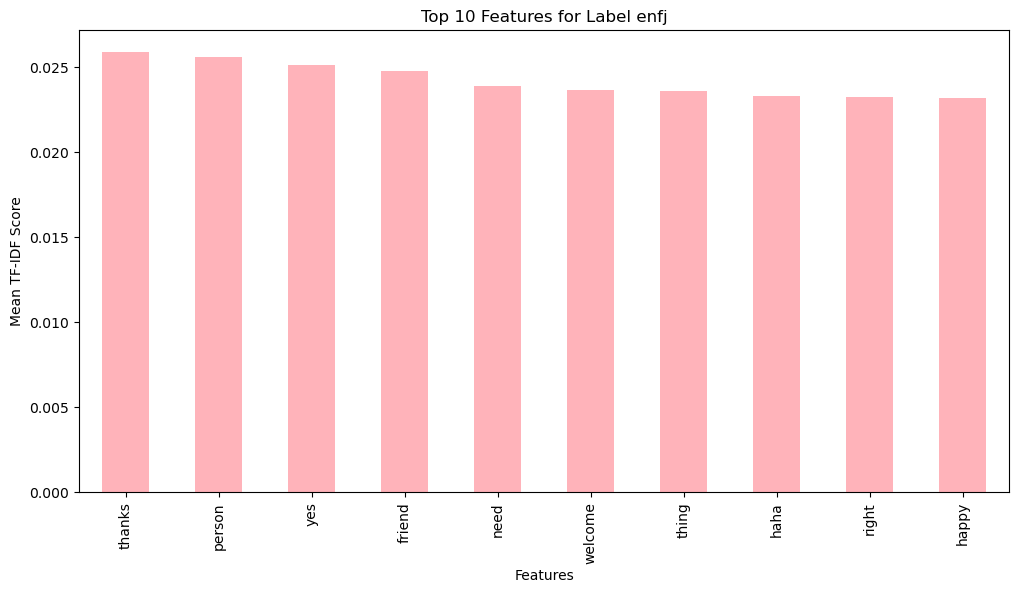

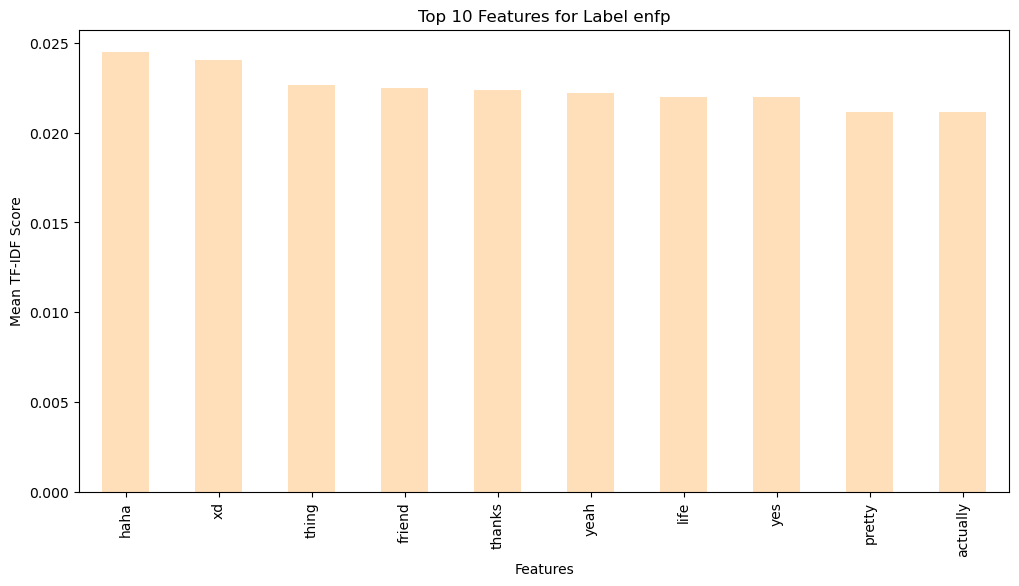

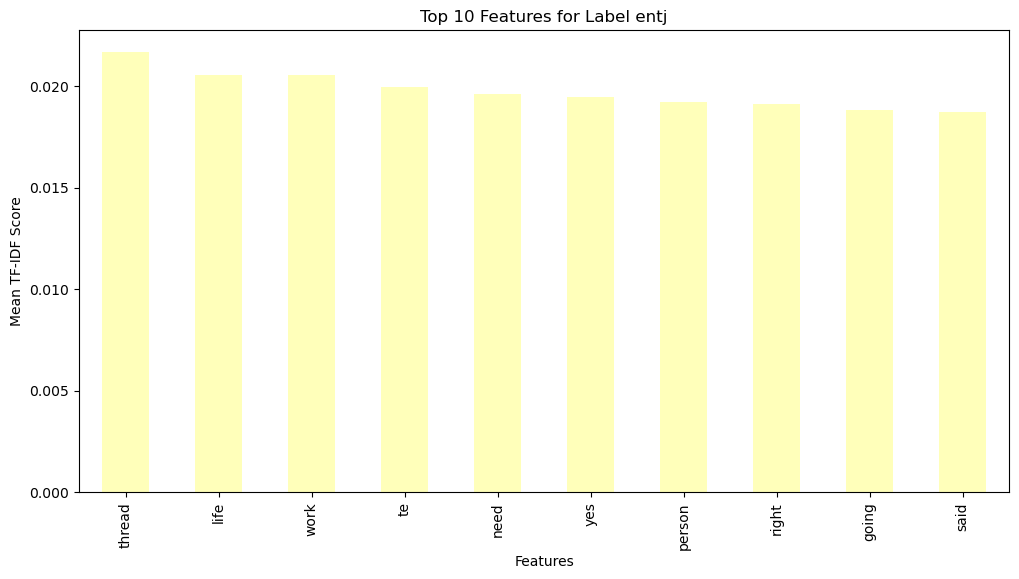

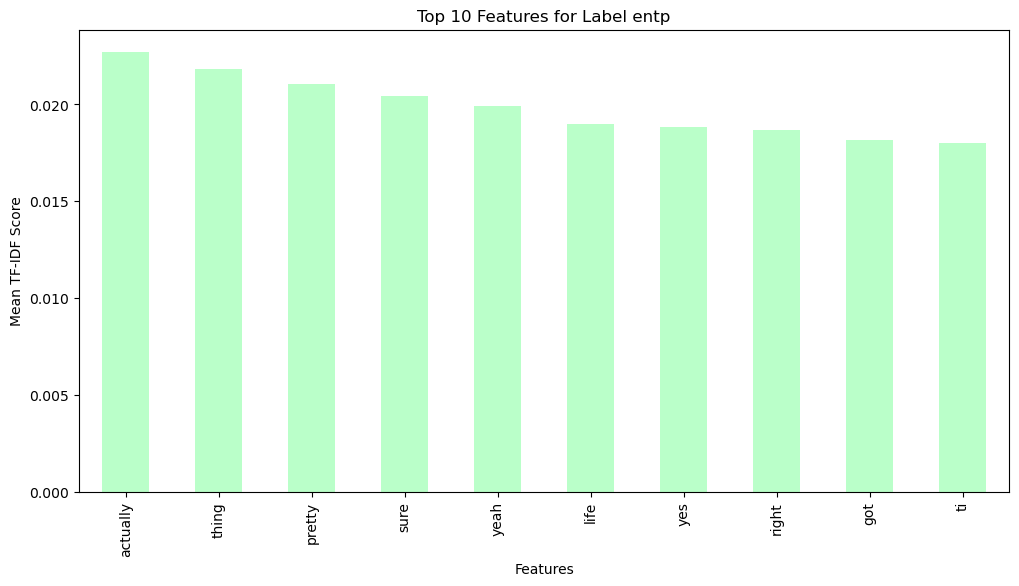

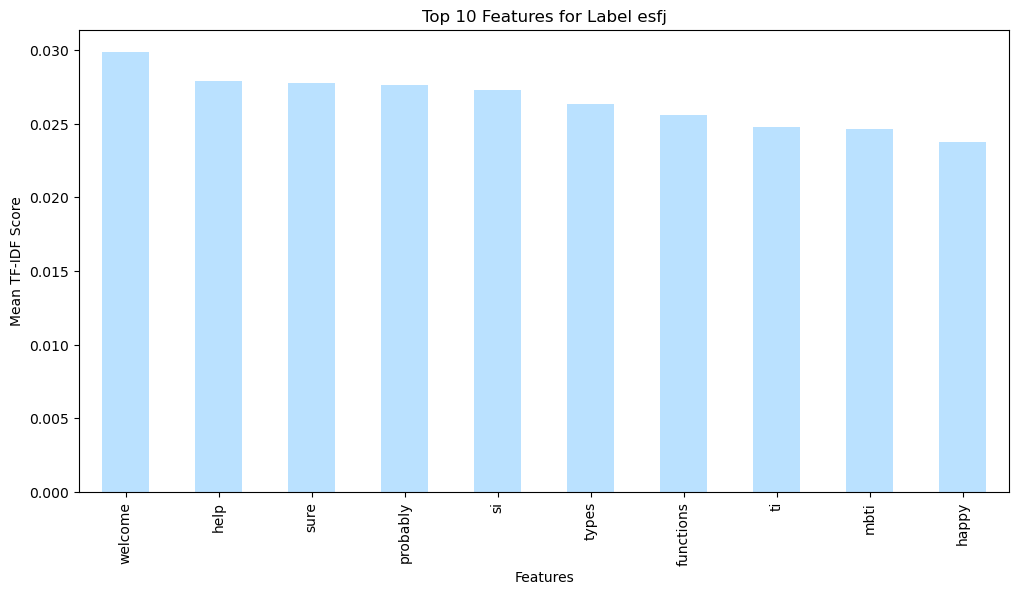

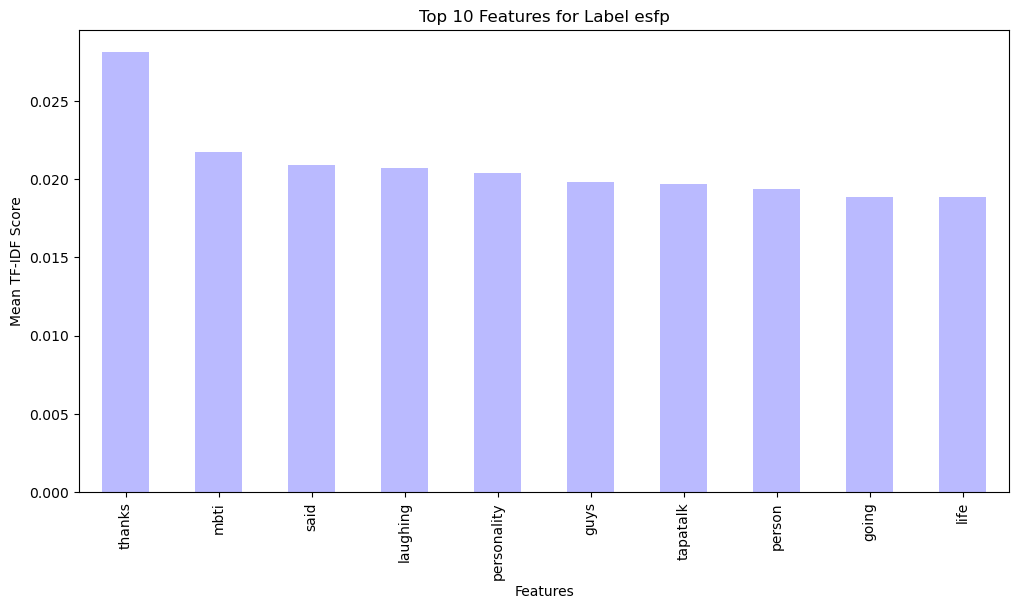

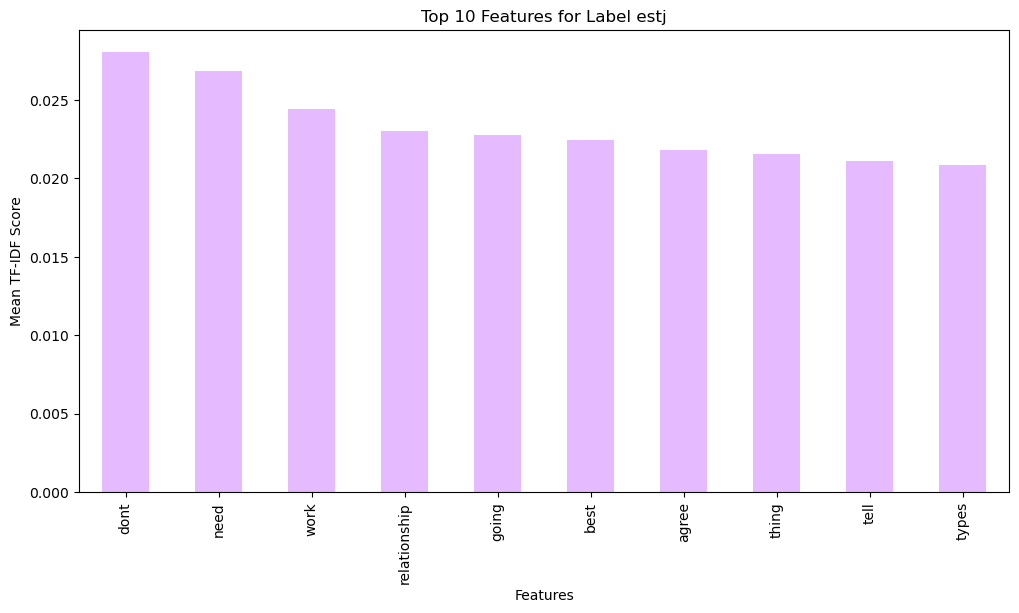

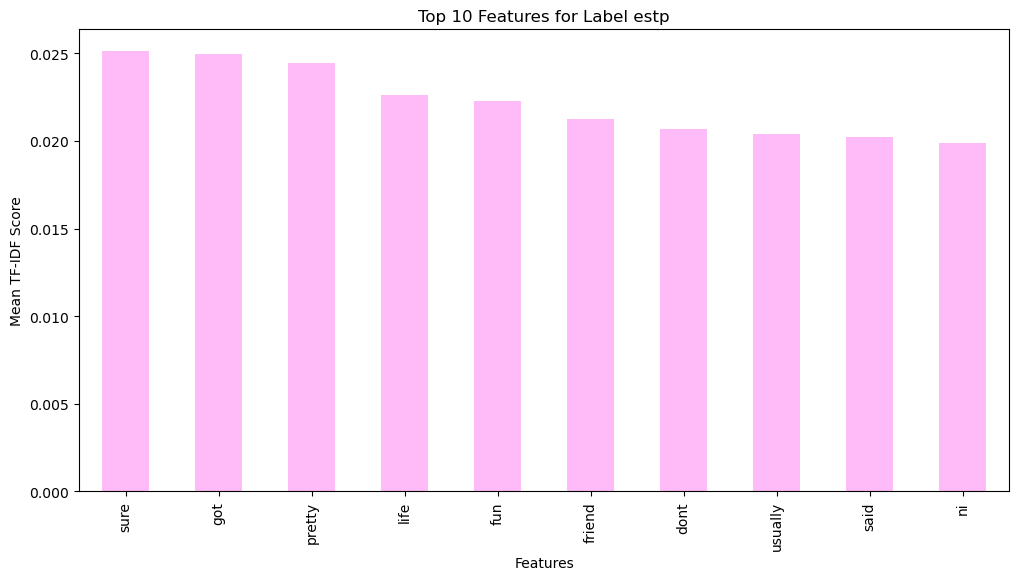

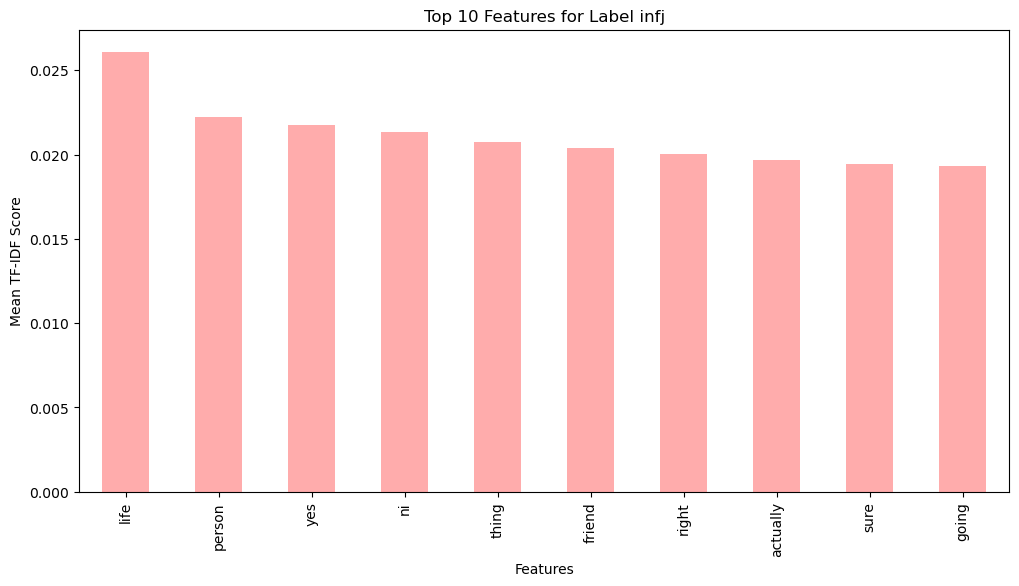

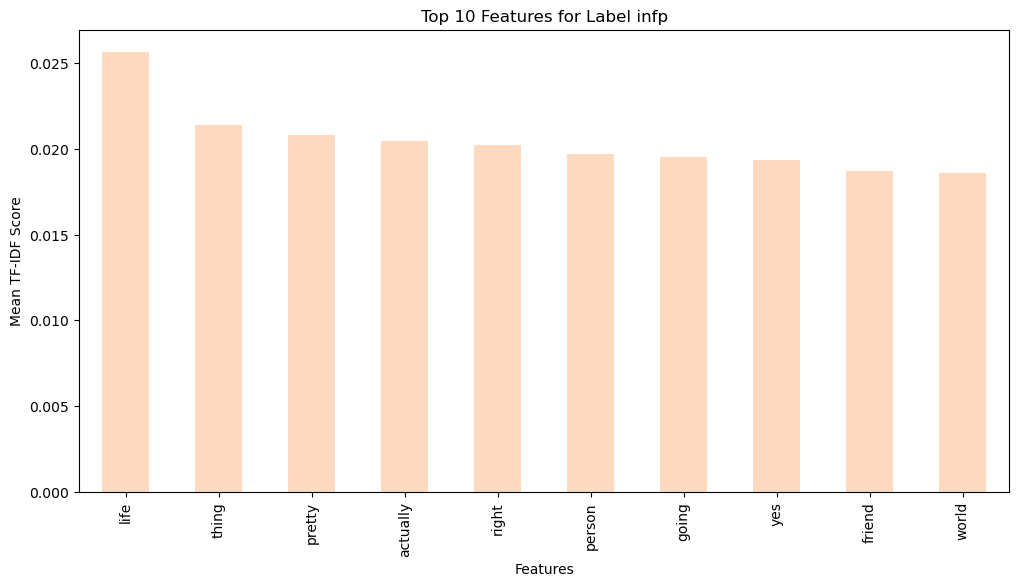

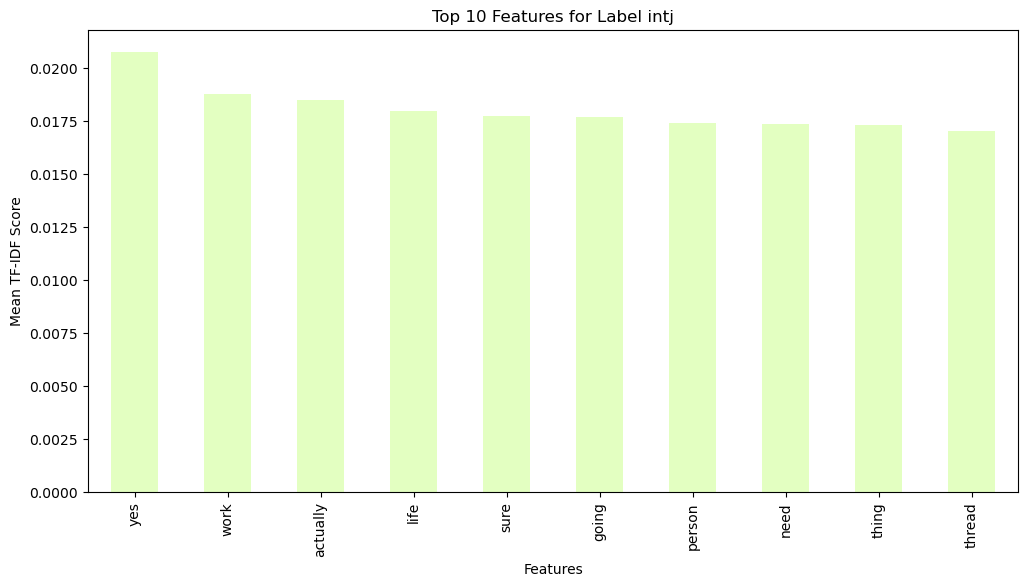

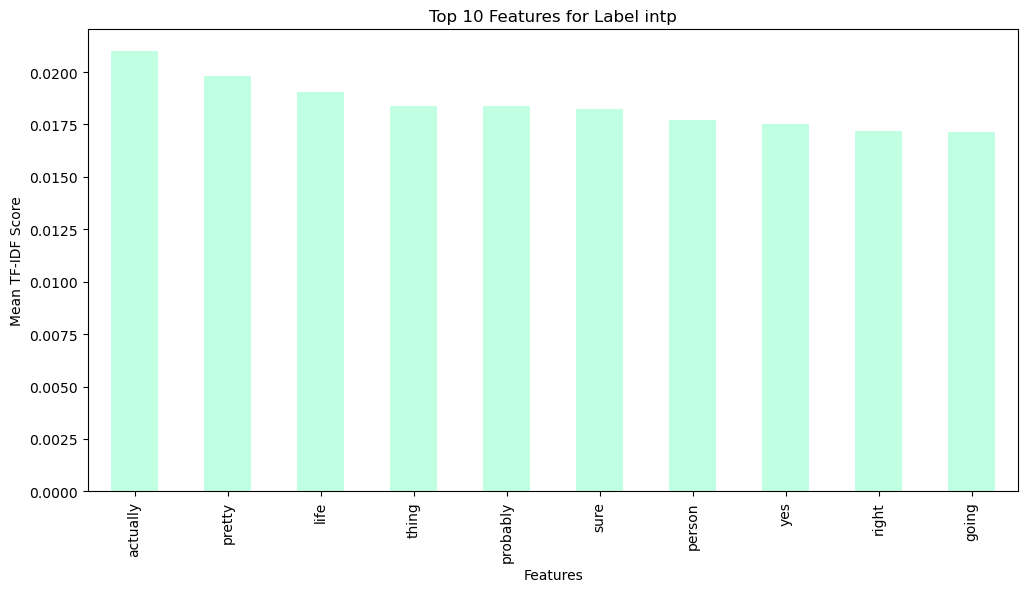

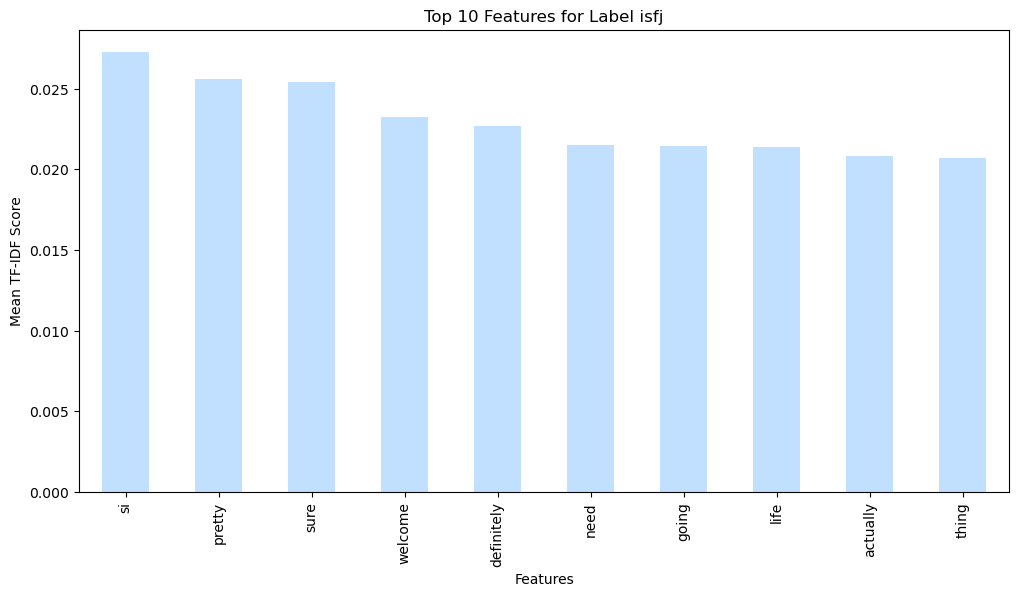

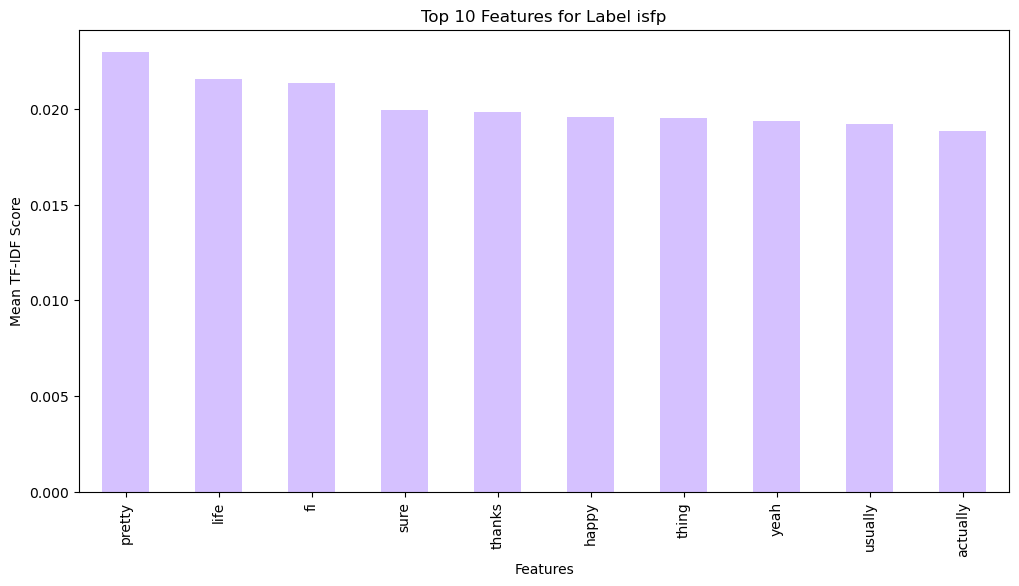

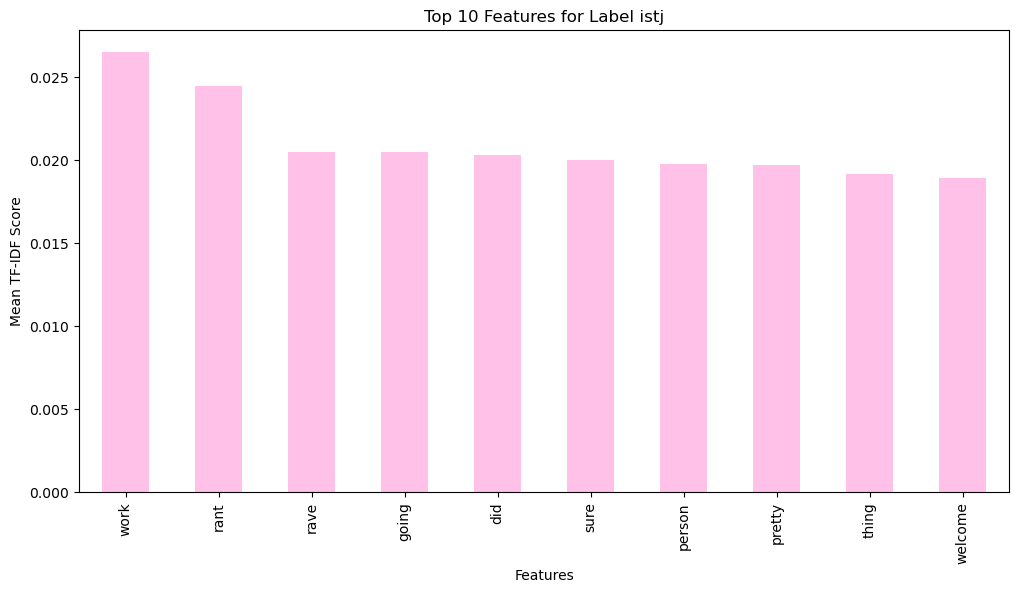

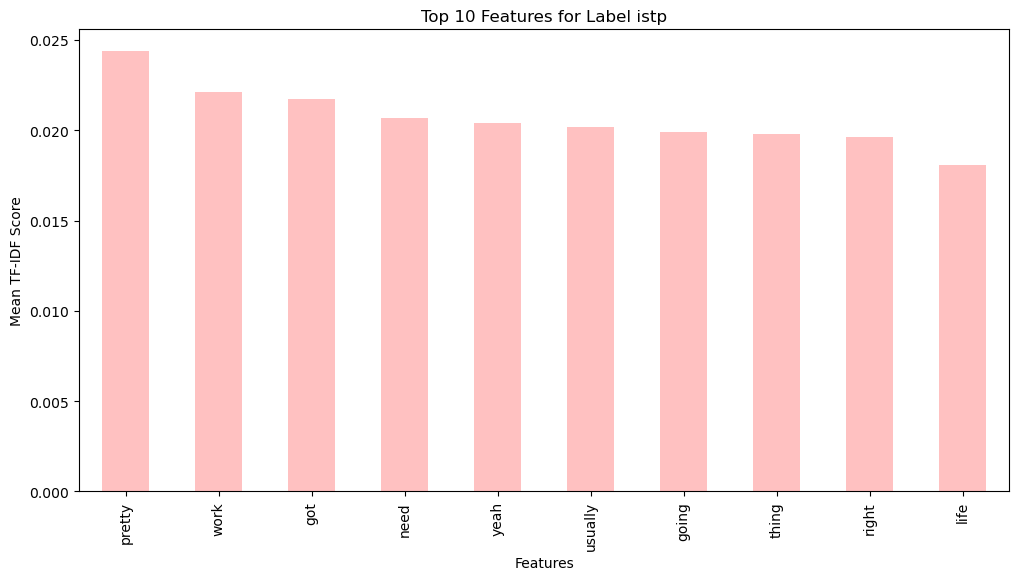

In [35]:
# Define a list of pastel colors
pastel_colors = [
    '#FFB3BA', '#FFDFBA', '#FFFFBA', '#BAFFC9', '#BAE1FF', '#BABAFF',
    '#E6BAFF', '#FFBAF8', '#FFACAC', '#FFDAC1', '#E3FFC1', '#C1FFE3',
    '#C1DFFF', '#D5C1FF', '#FFC1E8', '#FFC1C1'
]
attribute = ['enfj','enfp','entj','entp','esfj','esfp','estj','estp','infj','infp','intj','intp','isfj','isfp','istj','istp']
def plot_top_features(row, label, color):
    plt.figure(figsize=(12, 6))
    row.nlargest(10).plot(kind='bar', color=color)
    plt.title(f"Top 10 Features for Label {label}")
    plt.xlabel("Features")
    plt.ylabel("Mean TF-IDF Score")
    plt.show()

# Display the top 10 features for each label and plot them
for idx, (row, color) in enumerate(zip(mean_tfidf_by_label.iterrows(), pastel_colors)):
    label_idx = int(row[0])
    label = le.inverse_transform([label_idx])[0]
    plot_top_features(row[1], attribute[int(label)], color)

In [29]:
label = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15']
attribute = ['enfj','enfp','entj','entp','esfj','esfp','estj','estp','infj','infp','intj','intp','isfj','isfp','istj','istp']
label = pd.DataFrame(label,columns=['label'])
attribute = pd.DataFrame(attribute,columns=['attribute'])
table = pd.concat([label,attribute],axis=1)
table

label attribute
0      0      enfj
1      1      enfp
2      2      entj
3      3      entp
4      4      esfj
5      5      esfp
6      6      estj
7      7      estp
8      8      infj
9      9      infp
10    10      intj
11    11      intp
12    12      isfj
13    13      isfp
14    14      istj
15    15      istp

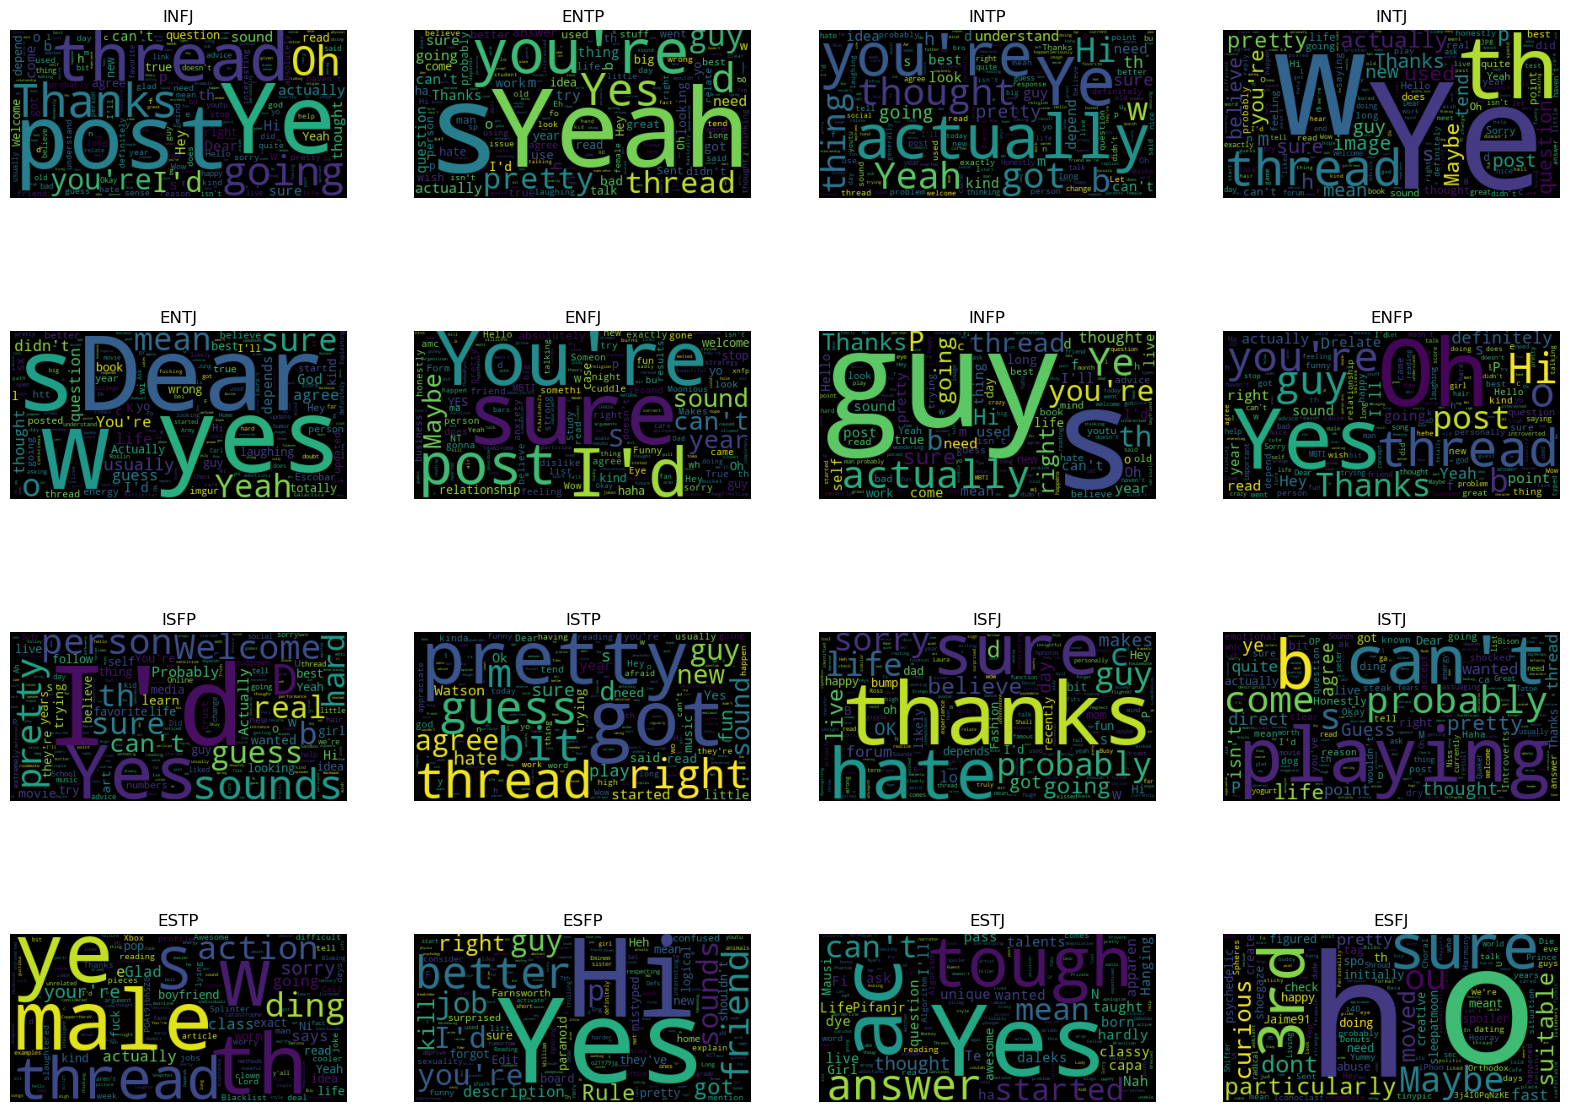

In [43]:
from wordcloud import WordCloud, STOPWORDS

labels = data['type'].unique()
row, col = 4, 4
custom_stop_words = ['I',"I'm","don't",'vt',"I've",'V','t']
stop_words = list(stop_words)+custom_stop_words

wc = WordCloud(stopwords=stop_words)

fig, ax = plt.subplots(4, 4, figsize=(20,15))

for i in range(4):
    for j in range(4):
        cur_type = labels[i*col+j]
        cur_ax = ax[i][j]
        df = data[data['type'] == cur_type]
        wordcloud = wc.generate(df['posts'].to_string())
        cur_ax.imshow(wordcloud)
        cur_ax.axis('off')
        cur_ax.set_title(cur_type)

# model comparison

In [4]:
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from tqdm import tqdm
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from imblearn.over_sampling import SMOTE
import plotly.express as px
import warnings

warnings.filterwarnings('ignore')
data=pd.read_csv('mbti_1.csv')
data.head()

C:\Users\ericc\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\ericc\anaconda3\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...

In [5]:
train_data,test_data=train_test_split(data,test_size=0.2,random_state=42,stratify=data.type)

In [6]:
def clear_text(data):
    data_length=[]
    lemmatizer=WordNetLemmatizer()
    cleaned_text=[]
    for sentence in tqdm(data.posts):
        sentence=sentence.lower()
        
#         removing links from text data
        sentence=re.sub('https?://[^\s<>"]+|www\.[^\s<>"]+',' ',sentence)
    
#         removing other symbols
        sentence=re.sub('[^0-9a-z]',' ',sentence)
    
        
        data_length.append(len(sentence.split()))
        cleaned_text.append(sentence)
    return cleaned_text,data_length

In [7]:
train_data.posts,train_length=clear_text(train_data)

100%|████████████████████████████████████████████████████████████████████████████| 6940/6940 [00:04<00:00, 1468.62it/s]


In [8]:
test_data.posts,test_length=clear_text(test_data)

100%|████████████████████████████████████████████████████████████████████████████| 1735/1735 [00:01<00:00, 1482.80it/s]


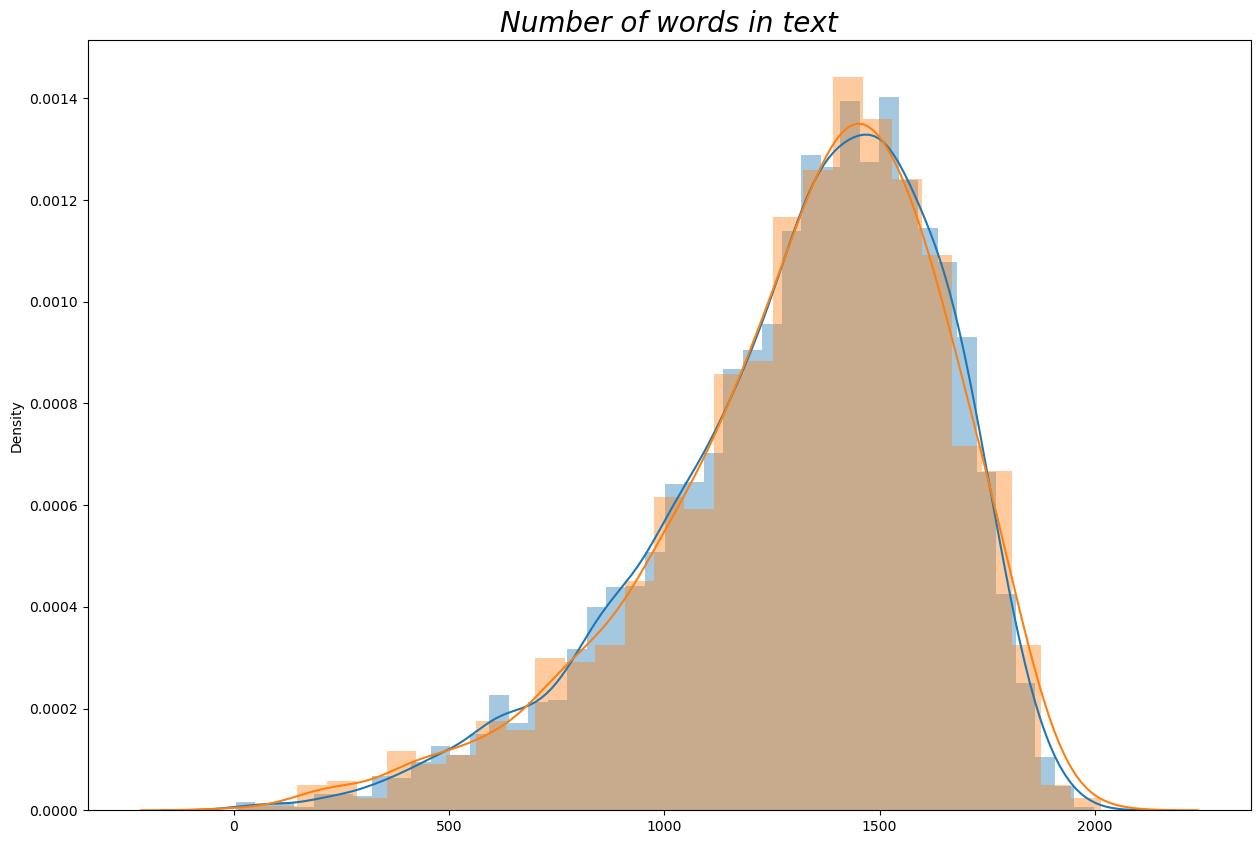

In [9]:
plt.figure(figsize=(15,10))
sns.distplot(train_length,label='train data word length')
sns.distplot(test_length,label='test data word length')
plt.title('Number of words in text',fontdict={'size':20,'style':'italic'})
plt.show()

In [10]:
class Lemmatizer(object):
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()
    def __call__(self, sentence):
        return [self.lemmatizer.lemmatize(word) for word in sentence.split() if len(word)>2]

In [11]:
# tokenization
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
vectorizer=TfidfVectorizer(max_features=5000,stop_words='english',tokenizer=Lemmatizer())
vectorizer.fit(train_data.posts)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ericc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ericc\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


TfidfVectorizer(max_features=5000, stop_words='english',
                tokenizer=<__main__.Lemmatizer object at 0x000001209BB4CEB0>)

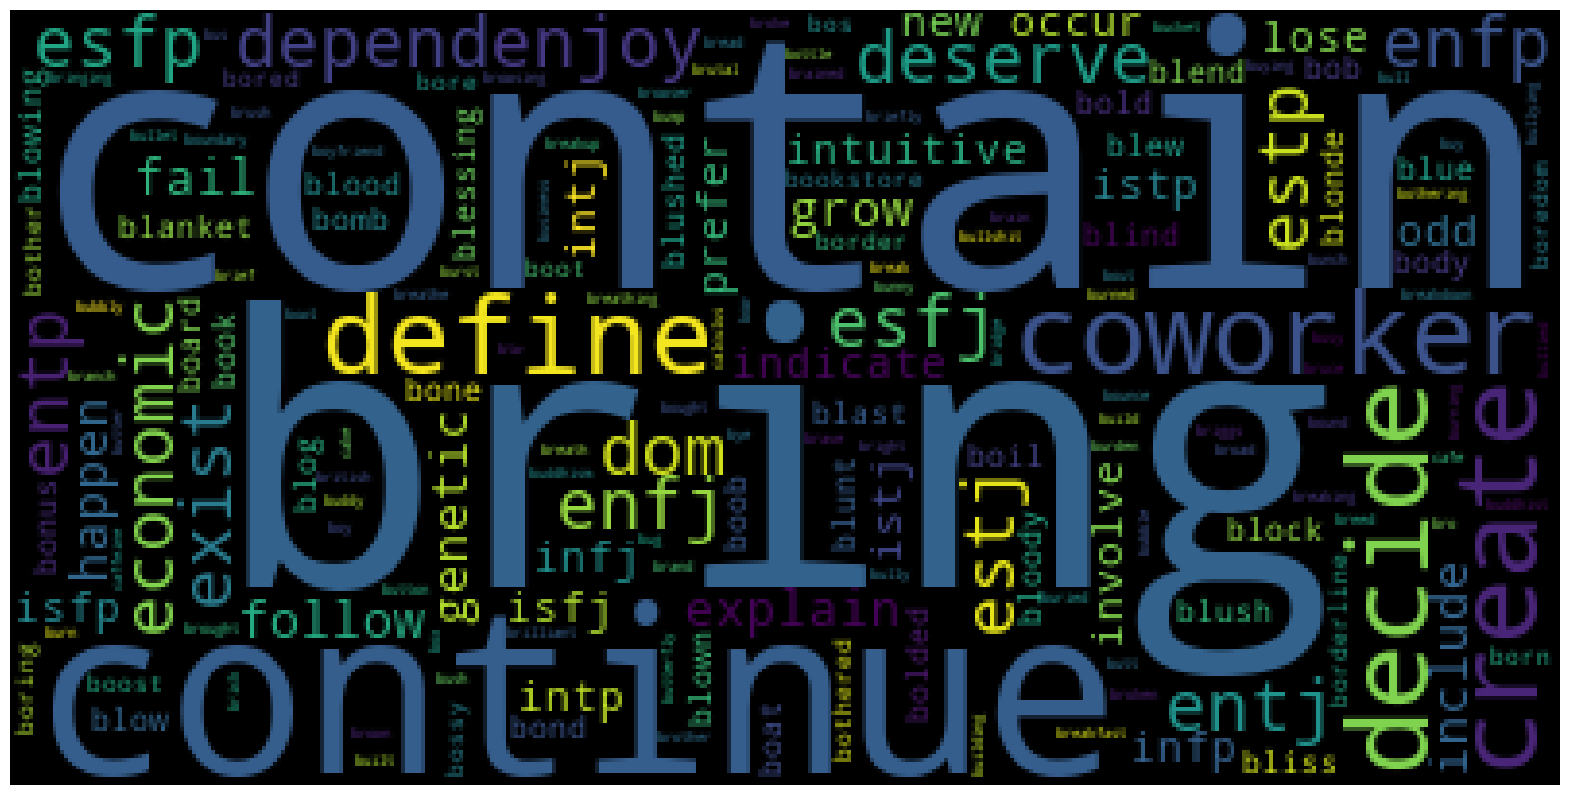

In [12]:
feature_names=vectorizer.get_feature_names_out()
wc=WordCloud(max_words=400)
wc.generate(' '.join(word for word in feature_names[500:3500] ))
plt.figure(figsize=(20,15))
plt.axis('off')
plt.imshow(wc)

In [13]:
train_post=vectorizer.transform(train_data.posts).toarray()
test_post=vectorizer.transform(test_data.posts).toarray()

In [14]:
target_encoder=LabelEncoder()
train_target=target_encoder.fit_transform(train_data.type)
test_target=target_encoder.fit_transform(test_data.type)

In [15]:
#model selection
models_accuracy={}

In [16]:
model_log=LogisticRegression(max_iter=3000,C=0.5,n_jobs=-1)
model_log.fit(train_post,train_target)

LogisticRegression(C=0.5, max_iter=3000, n_jobs=-1)

In [17]:
print('train classification report \n ',classification_report(train_target,model_log.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       0.86      0.16      0.27       152
        ENFP       0.80      0.65      0.72       540
        ENTJ       0.93      0.29      0.44       185
        ENTP       0.82      0.66      0.73       548
        ESFJ       0.00      0.00      0.00        33
        ESFP       0.00      0.00      0.00        38
        ESTJ       0.00      0.00      0.00        31
        ESTP       1.00      0.04      0.08        71
        INFJ       0.74      0.83      0.78      1176
        INFP       0.66      0.93      0.77      1466
        INTJ       0.73      0.80      0.77       873
        INTP       0.69      0.87      0.77      1043
        ISFJ       0.89      0.24      0.38       133
        ISFP       0.86      0.25      0.39       217
        ISTJ       0.86      0.27      0.41       164
        ISTP       0.86      0.51      0.64       270

    accuracy                           0.72      

In [18]:
print('test classification report \n',classification_report(test_target,model_log.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

test classification report 
               precision    recall  f1-score   support

        ENFJ       1.00      0.08      0.15        38
        ENFP       0.76      0.53      0.62       135
        ENTJ       0.75      0.13      0.22        46
        ENTP       0.66      0.51      0.58       137
        ESFJ       0.00      0.00      0.00         9
        ESFP       0.00      0.00      0.00        10
        ESTJ       0.00      0.00      0.00         8
        ESTP       0.00      0.00      0.00        18
        INFJ       0.64      0.71      0.67       294
        INFP       0.56      0.88      0.69       366
        INTJ       0.61      0.65      0.63       218
        INTP       0.67      0.84      0.74       261
        ISFJ       0.67      0.12      0.21        33
        ISFP       0.85      0.20      0.33        54
        ISTJ       0.60      0.07      0.13        41
        ISTP       0.71      0.45      0.55        67

    accuracy                           0.63      17

In [19]:
models_accuracy['logistic regression']=accuracy_score(test_target,model_log.predict(test_post))

In [20]:
model_linear_svc=LinearSVC(C=0.1)
model_linear_svc.fit(train_post,train_target)

LinearSVC(C=0.1)

In [21]:
print('train classification report \n ',classification_report(train_target,model_linear_svc.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n',classification_report(test_target,model_linear_svc.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       0.89      0.46      0.61       152
        ENFP       0.85      0.76      0.80       540
        ENTJ       0.92      0.64      0.76       185
        ENTP       0.84      0.82      0.83       548
        ESFJ       0.91      0.30      0.45        33
        ESFP       1.00      0.13      0.23        38
        ESTJ       1.00      0.26      0.41        31
        ESTP       0.92      0.48      0.63        71
        INFJ       0.82      0.86      0.84      1176
        INFP       0.77      0.93      0.84      1466
        INTJ       0.83      0.85      0.84       873
        INTP       0.81      0.90      0.85      1043
        ISFJ       0.92      0.67      0.77       133
        ISFP       0.89      0.58      0.70       217
        ISTJ       0.88      0.66      0.76       164
        ISTP       0.90      0.82      0.86       270

    accuracy                           0.82      

In [22]:
models_accuracy['Linear Support Vector classifier']=accuracy_score(test_target,model_linear_svc.predict(test_post))

In [23]:
model_svc=SVC()
model_svc.fit(train_post,train_target)

SVC()

In [24]:
print('train classification report \n ',classification_report(train_target,model_svc.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n ',classification_report(test_target,model_svc.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       0.97      0.86      0.91       152
        ENFP       0.96      0.95      0.95       540
        ENTJ       0.99      0.90      0.94       185
        ENTP       0.95      0.96      0.95       548
        ESFJ       1.00      0.58      0.73        33
        ESFP       1.00      0.37      0.54        38
        ESTJ       1.00      0.52      0.68        31
        ESTP       1.00      0.82      0.90        71
        INFJ       0.95      0.97      0.96      1176
        INFP       0.93      0.98      0.95      1466
        INTJ       0.96      0.96      0.96       873
        INTP       0.94      0.97      0.96      1043
        ISFJ       1.00      0.89      0.94       133
        ISFP       0.97      0.90      0.94       217
        ISTJ       0.94      0.92      0.93       164
        ISTP       0.97      0.94      0.95       270

    accuracy                           0.95      

In [25]:
models_accuracy['Support Vector classifier']=accuracy_score(test_target,model_svc.predict(test_post))

In [26]:
# naive bayes
model_multinomial_nb=MultinomialNB()
model_multinomial_nb.fit(train_post,train_target)

MultinomialNB()

In [27]:
print('train classification report \n ',classification_report(train_target,model_multinomial_nb.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n ',classification_report(test_target,model_multinomial_nb.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       0.00      0.00      0.00       152
        ENFP       0.89      0.01      0.03       540
        ENTJ       0.00      0.00      0.00       185
        ENTP       0.91      0.05      0.10       548
        ESFJ       0.00      0.00      0.00        33
        ESFP       0.00      0.00      0.00        38
        ESTJ       0.00      0.00      0.00        31
        ESTP       0.00      0.00      0.00        71
        INFJ       0.52      0.62      0.56      1176
        INFP       0.35      0.94      0.51      1466
        INTJ       0.78      0.42      0.54       873
        INTP       0.58      0.63      0.61      1043
        ISFJ       0.00      0.00      0.00       133
        ISFP       0.00      0.00      0.00       217
        ISTJ       0.00      0.00      0.00       164
        ISTP       0.00      0.00      0.00       270

    accuracy                           0.46      

In [28]:
models_accuracy['Multinomial Naive Bayes']=accuracy_score(test_target,model_multinomial_nb.predict(test_post))

In [29]:
#dicision tree
model_tree=DecisionTreeClassifier(max_depth=14)
model_tree.fit(train_post,train_target)

DecisionTreeClassifier(max_depth=14)

In [30]:
DecisionTreeClassifier(max_depth=14)

DecisionTreeClassifier(max_depth=14)

In [31]:
print('train classification report \n ',classification_report(train_target,model_tree.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n ',classification_report(test_target,model_tree.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       0.77      0.57      0.65       152
        ENFP       0.87      0.82      0.84       540
        ENTJ       0.92      0.67      0.78       185
        ENTP       0.93      0.76      0.84       548
        ESFJ       1.00      0.36      0.53        33
        ESFP       0.92      0.29      0.44        38
        ESTJ       0.85      0.35      0.50        31
        ESTP       0.68      0.45      0.54        71
        INFJ       0.80      0.86      0.83      1176
        INFP       0.63      0.92      0.75      1466
        INTJ       0.87      0.77      0.82       873
        INTP       0.88      0.81      0.84      1043
        ISFJ       0.98      0.40      0.57       133
        ISFP       0.97      0.64      0.77       217
        ISTJ       0.96      0.55      0.70       164
        ISTP       0.98      0.69      0.81       270

    accuracy                           0.79      

In [32]:
models_accuracy['Decision Tree classifier']=accuracy_score(test_target,model_tree.predict(test_post))

In [33]:
#random forest
model_forest=RandomForestClassifier(max_depth=10)
model_forest.fit(train_post,train_target)

RandomForestClassifier(max_depth=10)

In [34]:
print('train classification report \n ',classification_report(train_target,model_forest.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n ',classification_report(test_target,model_forest.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       1.00      0.01      0.03       152
        ENFP       0.98      0.42      0.58       540
        ENTJ       1.00      0.09      0.16       185
        ENTP       0.99      0.51      0.67       548
        ESFJ       0.00      0.00      0.00        33
        ESFP       0.00      0.00      0.00        38
        ESTJ       0.00      0.00      0.00        31
        ESTP       0.00      0.00      0.00        71
        INFJ       0.83      0.82      0.82      1176
        INFP       0.43      0.99      0.60      1466
        INTJ       0.91      0.72      0.80       873
        INTP       0.79      0.84      0.82      1043
        ISFJ       1.00      0.02      0.04       133
        ISFP       1.00      0.06      0.10       217
        ISTJ       1.00      0.01      0.02       164
        ISTP       1.00      0.14      0.25       270

    accuracy                           0.65      

In [35]:
models_accuracy['Random Forest Classifier']=accuracy_score(test_target,model_forest.predict(test_post))

In [39]:
#xgboost
model_xgb=XGBClassifier(max_depth=5,n_estimators=50,learning_rate=0.1)
model_xgb.fit(train_post,train_target)

[22:57:37] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [40]:
print('train classification report \n ',classification_report(train_target,model_xgb.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n ',classification_report(test_target,model_xgb.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       0.99      0.95      0.97       152
        ENFP       0.95      0.92      0.93       540
        ENTJ       0.99      0.91      0.95       185
        ENTP       0.94      0.91      0.93       548
        ESFJ       1.00      0.88      0.94        33
        ESFP       1.00      0.95      0.97        38
        ESTJ       1.00      0.84      0.91        31
        ESTP       1.00      0.97      0.99        71
        INFJ       0.92      0.91      0.92      1176
        INFP       0.90      0.95      0.92      1466
        INTJ       0.93      0.93      0.93       873
        INTP       0.91      0.92      0.91      1043
        ISFJ       1.00      0.94      0.97       133
        ISFP       0.99      0.92      0.95       217
        ISTJ       0.99      0.93      0.96       164
        ISTP       0.97      0.97      0.97       270

    accuracy                           0.93      

In [41]:
models_accuracy['XGBoost Classifier']=accuracy_score(test_target,model_xgb.predict(test_post))

In [44]:
#catboost
model_cat=CatBoostClassifier(iterations=100,loss_function='MultiClass',eval_metric='MultiClass',verbose=1)
model_cat.fit(train_post,train_target)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

Learning rate set to 0.5
0:	learn: 2.0456249	total: 11.3s	remaining: 18m 34s
1:	learn: 1.8372632	total: 21.3s	remaining: 17m 24s
2:	learn: 1.7729987	total: 31.3s	remaining: 16m 51s
3:	learn: 1.6807452	total: 41.6s	remaining: 16m 39s
4:	learn: 1.6069383	total: 52.7s	remaining: 16m 41s
5:	learn: 1.5484711	total: 1m 2s	remaining: 16m 23s
6:	learn: 1.5305804	total: 1m 12s	remaining: 16m 9s
7:	learn: 1.5072045	total: 1m 23s	remaining: 16m
8:	learn: 1.4847782	total: 1m 40s	remaining: 16m 57s
9:	learn: 1.4670500	total: 1m 56s	remaining: 17m 26s
10:	learn: 1.4454743	total: 2m 6s	remaining: 17m 2s
11:	learn: 1.4216389	total: 2m 16s	remaining: 16m 42s
12:	learn: 1.4116617	total: 2m 27s	remaining: 16m 23s
13:	learn: 1.4035317	total: 2m 36s	remaining: 16m 3s
14:	learn: 1.3850354	total: 2m 46s	remaining: 15m 46s
15:	learn: 1.3687009	total: 2m 57s	remaining: 15m 32s
16:	learn: 1.3379378	total: 3m 8s	remaining: 15m 20s
17:	learn: 1.3038352	total: 3m 19s	remaining: 15m 6s
18:	learn: 1.2742049	total: 3

In [45]:
print('train classification report \n ',classification_report(train_target,model_cat.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n ',classification_report(test_target,model_cat.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       0.69      0.51      0.58       152
        ENFP       0.69      0.64      0.66       540
        ENTJ       0.79      0.50      0.62       185
        ENTP       0.70      0.68      0.69       548
        ESFJ       0.90      0.27      0.42        33
        ESFP       0.88      0.18      0.30        38
        ESTJ       1.00      0.23      0.37        31
        ESTP       0.81      0.41      0.54        71
        INFJ       0.72      0.75      0.74      1176
        INFP       0.72      0.81      0.77      1466
        INTJ       0.71      0.70      0.71       873
        INTP       0.67      0.80      0.73      1043
        ISFJ       0.75      0.59      0.66       133
        ISFP       0.66      0.51      0.57       217
        ISTJ       0.73      0.49      0.59       164
        ISTP       0.73      0.69      0.71       270

    accuracy                           0.71      

In [46]:
models_accuracy['CatBoost Classifier']=accuracy_score(test_target,model_cat.predict(test_post))

In [47]:
models_accuracy.keys()

dict_keys(['logistic regression', 'Linear Support Vector classifier', 'Support Vector classifier', 'Multinomial Naive Bayes', 'Decision Tree classifier', 'Random Forest Classifier', 'XGBoost Classifier', 'CatBoost Classifier'])

In [48]:
accuarcy=pd.DataFrame(models_accuracy.items(),columns=['Models','Test accuracy'])

In [49]:
accuarcy.sort_values(by='Test accuracy',ascending=False,ignore_index=True).style.background_gradient(cmap='Blues')

# BERT

In [1]:
import numpy as np # linear algebra
import pandas as pd
data = pd.read_csv("mbti_1.csv")
types = np.unique(data.type.values)

def get_type_index(string):
    return list(types).index(string)

data['type_index'] = data['type'].apply(get_type_index)

In [2]:
import string
import re

def clean_text(text):
    regex = re.compile('[%s]' % re.escape('|'))
    text = regex.sub(" ", text)
    words = str(text).split()
    words = [i.lower() + " " for i in words]
    words = [i for i in words if not "http" in i]
    words = " ".join(words)
    words = words.translate(words.maketrans('', '', string.punctuation))
    return words

In [3]:
data['cleaned_text'] = data['posts'].apply(clean_text)

In [4]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data)
train, val = train_test_split(train)

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
trunc_type = "post"
pad_type = "post"
oov_tok = "<OOV>"
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(data.cleaned_text.values)

In [8]:
maxlen = 1500
train_sequences = tokenizer.texts_to_sequences(train.cleaned_text.values)
train_padded = pad_sequences(train_sequences, maxlen = maxlen, truncating = trunc_type, padding = pad_type)

val_sequences = tokenizer.texts_to_sequences(val.cleaned_text.values)
val_padded = pad_sequences(val_sequences, maxlen = maxlen, truncating = trunc_type, padding = pad_type)

In [9]:
one_hot_labels = tf.keras.utils.to_categorical(train.type_index.values, num_classes=16)
val_labels= tf.keras.utils.to_categorical(val.type_index.values, num_classes=16)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Flatten, Dropout, Conv1D, GlobalMaxPooling1D

def create_model():
    op = tf.keras.optimizers.Adam(learning_rate=0.00001)

    model = Sequential()
    model.add(Embedding(vocab_size, 256, input_length=maxlen-1))
    model.add(Dropout(0.3))
    model.add(Bidirectional(LSTM(200, return_sequences=True)))
    model.add(Dropout(0.3))
    model.add(Bidirectional(LSTM(20)))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(16, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=op, metrics=['accuracy'])
    return model

In [ ]:
use_tpu = True
if use_tpu:
    # Create distribution strategy
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)

    # Create model
    with strategy.scope():
        model = create_model()
else:
    model = create_model()
    
model.summary()

In [12]:
from tensorflow.keras import layers
from tensorflow import keras
class MultiHeadSelfAttention(layers.Layer):
    def __init__(self, embed_dim, num_heads=8):
        super(MultiHeadSelfAttention, self).__init__()
        self.embed_dim = embed_dim
        self.num_heads = num_heads
        if embed_dim % num_heads != 0:
            raise ValueError(
                f"embedding dimension = {embed_dim} should be divisible by number of heads = {num_heads}"
            )
        self.projection_dim = embed_dim // num_heads
        self.query_dense = layers.Dense(embed_dim)
        self.key_dense = layers.Dense(embed_dim)
        self.value_dense = layers.Dense(embed_dim)
        self.combine_heads = layers.Dense(embed_dim)

    def attention(self, query, key, value):
        score = tf.matmul(query, key, transpose_b=True)
        dim_key = tf.cast(tf.shape(key)[-1], tf.float32)
        scaled_score = score / tf.math.sqrt(dim_key)
        weights = tf.nn.softmax(scaled_score, axis=-1)
        output = tf.matmul(weights, value)
        return output, weights

    def separate_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.projection_dim))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, inputs):
        # x.shape = [batch_size, seq_len, embedding_dim]
        batch_size = tf.shape(inputs)[0]
        query = self.query_dense(inputs)  # (batch_size, seq_len, embed_dim)
        key = self.key_dense(inputs)  # (batch_size, seq_len, embed_dim)
        value = self.value_dense(inputs)  # (batch_size, seq_len, embed_dim)
        query = self.separate_heads(
            query, batch_size
        )  # (batch_size, num_heads, seq_len, projection_dim)
        key = self.separate_heads(
            key, batch_size
        )  # (batch_size, num_heads, seq_len, projection_dim)
        value = self.separate_heads(
            value, batch_size
        )  # (batch_size, num_heads, seq_len, projection_dim)
        attention, weights = self.attention(query, key, value)
        attention = tf.transpose(
            attention, perm=[0, 2, 1, 3]
        )  # (batch_size, seq_len, num_heads, projection_dim)
        concat_attention = tf.reshape(
            attention, (batch_size, -1, self.embed_dim)
        )  # (batch_size, seq_len, embed_dim)
        output = self.combine_heads(
            concat_attention
        )  # (batch_size, seq_len, embed_dim)
        return output

In [13]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadSelfAttention(embed_dim, num_heads)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

In [14]:
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, emded_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=emded_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=emded_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [ ]:
embed_dim = 32  # Embedding size for each token
num_heads = 2  # Number of attention heads
ff_dim = 32  # Hidden layer size in feed forward network inside transformer

def create_model(): 
    inputs = layers.Input(shape=(maxlen,))
    embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
    x = embedding_layer(inputs)
    transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
    x = transformer_block(x)
    # x = layers.GlobalAveragePooling1D()(x)
    # x = layers.Dropout(0.1)(x)
    x = (Bidirectional(LSTM(200, return_sequences=True)))(x)
    x = (Dropout(0.3))(x)
    x = (Bidirectional(LSTM(20)))(x)
    x = layers.Dense(20, activation="relu")(x)
    x = layers.Dropout(0.1)(x)
    outputs = layers.Dense(16, activation="softmax")(x)
    
    op = tf.keras.optimizers.Adam(learning_rate=0.00001)

    model = keras.Model(inputs=inputs, outputs=outputs)
    model.compile(op, 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [ ]:
use_tpu = True
if use_tpu:
    # Create distribution strategy
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)

    # Create model
    with strategy.scope():
        model = create_model()
else:
    model = create_model()
    
model.summary()

In [ ]:
model.fit(train_padded, one_hot_labels, epochs =30, verbose = 1, 
          validation_data = (val_padded, val_labels), callbacks = [tf.keras.callbacks.EarlyStopping(patience = 3)])

In [15]:
import transformers
tokenizer = transformers.AutoTokenizer.from_pretrained('bert-large-uncased')

C:\Users\ericc\anaconda3\envs\st\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\ericc\anaconda3\envs\st\Lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\ericc\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: htt

In [16]:
maxlen = 1500

train_input_ids = [tokenizer.encode(str(i), max_length = maxlen , pad_to_max_length = True) for i in train.cleaned_text.values]
val_input_ids = [tokenizer.encode(str(i), max_length = maxlen , pad_to_max_length = True) for i in val.cleaned_text.values]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
C:\Users\ericc\anaconda3\envs\st\Lib\site-packages\transformers\tokenization_utils_base.py:2354: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [17]:
def create_model(): 
    input_word_ids = tf.keras.layers.Input(shape=(maxlen,), dtype=tf.int32,
                                           name="input_word_ids")
    bert_layer = transformers.TFBertModel.from_pretrained('bert-large-uncased')
    bert_outputs = bert_layer(input_word_ids)[0]
    pred = tf.keras.layers.Dense(16, activation='softmax')(bert_outputs[:,0,:])
    
    model = tf.keras.models.Model(inputs=input_word_ids, outputs=pred)
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.00001), metrics=['accuracy'])
    return model

In [19]:
use_tpu = True
if use_tpu:
    # Create distribution strategy
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)

    # Create model
    with strategy.scope():
        model = create_model()
else:
    model = create_model()
model = create_model()
    
model.summary()

Some layers from the model checkpoint at bert-large-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-large-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_word_ids (InputLayer)  [(None, 1500)]           0         
                                                                 
 tf_bert_model (TFBertModel)  TFBaseModelOutputWithPoo  335141888
                             lingAndCrossAttentions(l            
                             ast_hidden_state=(None,             
                             1500, 1024),                        
                              pooler_output=(None, 10            
                             24),                                
                              past_key_values=None, h            
                             idden_states=None, atten            
                             tions=None, cross_attent            
                             ions=None)                          
                                                             

In [21]:
use_gpu = True
if use_gpu:
    # Create distribution strategy
    strategy = tf.distribute.OneDeviceStrategy("GPU:0")

    # Create model
    with strategy.scope():
        model = create_model()
else:
    model = create_model()

Some layers from the model checkpoint at bert-large-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-large-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [22]:
batch_size = 16

model.fit(np.array(train_input_ids), one_hot_labels,validation_data = (np.array(val_input_ids), val_labels),
          verbose = 1, epochs = 20, batch_size = batch_size,  callbacks = [tf.keras.callbacks.EarlyStopping(patience = 5)])

Epoch 1/20


KeyboardInterrupt: 

In [ ]:
test_input_ids = [tokenizer.encode(str(i), max_length = maxlen , pad_to_max_length = True) for i in test.cleaned_text.values]
test_labels= tf.keras.utils.to_categorical(test.type_index.values, num_classes=16)

In [ ]:
model.evaluate(np.array(test_input_ids), test_labels)

# Deep learning comparison 

In [3]:
import numpy
import pandas as pd
import string
import re
import itertools
from math import sqrt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Embedding, Masking, Bidirectional, Flatten, SpatialDropout1D, Dropout, GRU, Input
import transformers
from tensorflow.keras.utils import plot_model
from tqdm.notebook import tqdm
from gensim.utils import tokenize as gensim_tokenize
from gensim import models
from collections import defaultdict
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from tensorflow.keras import callbacks
!pip install contractions
import contractions
from collections import defaultdict
pandas.options.display.max_rows = 250
pandas.options.display.max_colwidth = 200
tqdm.pandas()
contractions.add('e.g.', 'for example')
contractions.add('e.g.,', 'for example')
contractions.add('T.G.I.F.', 'thank God it is Friday')

In [4]:
data = pd.read_csv('mbti_1.csv')

In [60]:
import tensorflow as tf
import tensorflow_hub as hub
print("Tensorflow version " + tf.__version__)

try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect() # TPU detection
    strategy = tf.distribute.TPUStrategy(tpu)
    print("TPU detected")
except ValueError:
    strategy = tf.distribute.MirroredStrategy() # for GPU or multi-GPU machines
    print("GPU detected")

print("Number of accelerators: ", strategy.num_replicas_in_sync)
GCS_PATH = KaggleDatasets().get_gcs_path("mbti-type") # you can list the bucket with "!gsutil ls $GCS_PATH"
print(GCS_PATH)

ImportError: cannot import name 'MomentumParameters' from 'tensorflow.python.tpu.tpu_embedding' (C:\Users\ericc\anaconda3\lib\site-packages\tensorflow\python\tpu\tpu_embedding.py)

In [5]:
def convert_emojis(text):
    for emoji, meaning in UNICODE_EMO.items():
        text = text.replace(emoji, meaning)
    return text

def convert_emoticons(text):
    for emoticon, meaning in EMOTICONS.items():
        text = re.sub(emoticon, meaning, text)
        text = re.sub(emoticon.lower(), meaning, text)
    return text

def process_and_tokenize(text):
    """
    1. Replace URLs in text
    2. Replace emojis and emoticons with their meanings
    3. Replace contractions with expanded forms
    4. Tokenize text
    """
    text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', 'url', text).strip()
    text = convert_emojis(text)
    text = convert_emoticons(text)
    text = contractions.fix(text)
    return list(gensim_tokenize(text, lower=True))

def get_mbti_vector(mbti_type):
    I, N, F, P = mbti_type
    mbti_vector = [I == 'I', N == 'N', F == 'F', P == 'P']
    return numpy.array(mbti_vector).astype(int)

def plot_num_posts_by_indicator(df):
    fig = make_subplots(rows=2, cols=2)
    for i, (one, opp) in enumerate(zip(one_slice, opposite)):
        counts = df.groupby(one).type.count().sort_index()
        row = 1 if i <= 1 else 2
        col = 1 if i in [0, 2] else 2
        fig.append_trace(go.Bar(x=[opp, one], y=counts.tolist()), row=row, col=col)
    fig.update_layout(showlegend=False, title='Number of posts split by each indicator')
    fig.show()

def plot_num_posts_by_length(title, df):
    token_len = df.tokens.apply(len)
    token_len_dist = df.groupby(token_len).type.count()
    fig = px.bar(token_len_dist.reset_index(), x='tokens', y='type', title=title)
    fig.update_layout(xaxis_title="Sentence Length (Num. of tokens)", yaxis_title="Count")
    fig.show()
    return token_len, token_len_dist

def plot_num_posts_by_type(df):
    type_posts = df.groupby('type').posts.count().sort_values(ascending=False).reset_index()
    fig = px.bar(type_posts, x='type', y='posts', title='Number of posts by MBTI type')
    fig.update_layout(xaxis_title='MBTI Type', yaxis_title='Count')
    fig.show()

def get_length_filtered_df(df, token_len, min_tokens):
    return df[token_len >= min_tokens]

def get_token_freq(df):
    token_freq = defaultdict(int)
    for token_list in df.tokens:
        for token in token_list:
            token_freq[token] += 1
    token_freq = pandas.Series(token_freq)
    token_freq_ser = token_freq.groupby(token_freq).count()
    token_freq_ser.name = 'NumTokens'
    token_freq_ser.index.name = 'Freq'
    return token_freq, token_freq_ser

def get_token_analysis(min_freq):
    total_words = (token_freq_ser.index * token_freq_ser).sum()
    total_num_tokens = token_freq_ser.sum()
    invalid_token_freq = token_freq_ser[token_freq_ser.index <= min_freq]
    invalid_total_words = (invalid_token_freq.index * invalid_token_freq).sum()
    invalid_tokens = invalid_token_freq.sum()
    return round(invalid_total_words/total_words*100, 2), round(invalid_tokens/total_num_tokens*100, 2), total_num_tokens - invalid_tokens

def plot_changes():
    min_freqs = list(range(0, 11))
    total_tokens_list, unique_tokens_list, valid_tokens_list = [], [], []
    for min_freq in min_freqs:
        total_tokens, unique_tokens, valid_tokens = get_token_analysis(min_freq)
        total_tokens_list.append(100 - total_tokens)
        unique_tokens_list.append(100 - unique_tokens)
        valid_tokens_list.append(valid_tokens)

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=min_freqs, y=total_tokens_list , name="Percentage of total number of words remaining"))
    fig.add_trace(go.Scatter(x=min_freqs, y=unique_tokens_list, name="Percentage of number of unique tokens remaining"))
    fig.update_layout(showlegend=True, legend=dict(yanchor="top", y=0.75, xanchor="right", x=0.99), xaxis_title="Min. Freq. Count", 
                      yaxis_title="Percentage")
    fig.show()

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=min_freqs, y=valid_tokens_list , name="Valid unique tokens"))
    fig.update_layout(showlegend=True, legend=dict(yanchor="top", y=0.99, xanchor="right", x=0.99), xaxis_title="Min. Freq. Count", 
                      yaxis_title="Count of Valid Unique Tokens")
    fig.show()

In [6]:
one_slice = ['I', 'N', 'F', 'P']  # One slice of the indicators
opposite = ['E', 'S', 'T', 'J']  # Other end of the respective indicators
df_lens = []

In [8]:
dfposts = data
df_lens.append(len(dfposts))
dfposts.loc[:, 'posts'] = dfposts['posts'].apply(lambda x: x[1:-1].split('|||'))
dfposts = dfposts.explode('posts', ignore_index=True)
dfposts['tokens'] = dfposts.posts.progress_apply(process_and_tokenize)
dfposts[one_slice] = dfposts.type.apply(get_mbti_vector).tolist()

  0%|          | 0/422845 [00:00<?, ?it/s]

NameError: name 'UNICODE_EMO' is not defined

In [ ]:
token_freq, token_freq_ser = get_token_freq(dfposts)
plot_changes()

In [ ]:
min_freq = 8
vocab = set(token_freq[token_freq > min_freq].index)
dfposts['tokens'] = dfposts.tokens.apply(lambda x: list(filter(lambda y: y in vocab, x)))

In [ ]:
token_len, token_len_dist = plot_num_posts_by_length('Sentence length distribution before processing', dfposts)

In [ ]:
min_tokens = 5  # min sentence length 
_ = plot_num_posts_by_length('Sentence length distribution after processing', get_length_filtered_df(dfposts, token_len, min_tokens))

In [ ]:
prev_len = len(dfposts)
dfposts = get_length_filtered_df(dfposts, token_len, min_tokens)
df_lens.extend([len(dfposts), prev_len-len(dfposts)])

In [ ]:
nodes = ['Initial', 'Explosion', 'Valid Length', 'Invalid Length']
colors = ['rgba(0, 127, 0, 0.8)', 'rgba(0, 255, 0, 0.8)', 'rgba(0, 0, 191, 0.8)', 'rgba(191, 0, 0, 0.8)']

fig = go.Figure(data=[go.Sankey(
    valueformat = ".0f",
    node = dict(
      pad = 15,
      thickness = 15,
      line = dict(color = "black", width = 0.5),
      label = nodes,
      color = colors
    ),
    link = dict(
      source = [0, 1, 1],
      target = [1, 2, 3],
      value = df_lens,
))])


fig.update_layout(title_text='How the number of data points change over the process')
fig.show()

In [ ]:
plot_num_posts_by_type(dfposts)
plot_num_posts_by_indicator(dfposts)

In [ ]:
max_tokens = 40  # max sentence length
target = dfposts[one_slice].to_numpy()

In [ ]:
vocab = set(w for l in dfposts.tokens for w in l)
vocab = {w: i + 1 for i, w in enumerate(vocab)}
dfposts['token_idxs'] = dfposts.tokens.apply(lambda l: [vocab[w] for w in l])
features = pad_sequences(dfposts['token_idxs'], maxlen=max_tokens, value=0., padding='pre', truncating='pre')
x_train, x_test, y_train, y_test = train_test_split(features, target, train_size=0.9, shuffle=True)

In [ ]:
tokenizer = transformers.AutoTokenizer.from_pretrained('bert-large-uncased')
token_ids = []
for token_list in dfposts['tokens']:
    temp = tokenizer.encode(text=token_list, padding='max_length', truncation=True, max_length=max_tokens, is_split_into_words=True)
    token_ids.append(temp)

features = numpy.array(token_ids)
bx_train, bx_test, by_train, by_test = train_test_split(features, target, train_size=0.9, shuffle=True)

In [ ]:
Y = 10  # Output dimension of LSTM cell
BS = 16 * strategy.num_replicas_in_sync  # Batch size

In [ ]:
def get_model(embedding, sequence):
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.001, decay_steps=10000, decay_rate=0.9)
    with strategy.scope(): # Define model inside strategy scope
        model = Sequential(name="Model")
        model.add(embedding)
        model.add(SpatialDropout1D(0.2, name='DroppingEmbeddings'))
        model.add(sequence)  
        model.add(Flatten(name='FlattenLSTMOutputs'))
        model.add(Dense(units=int(sqrt(max_tokens * Y)), activation='relu', name='HiddenLayer'))
        model.add(Dropout(0.2, name='DroppingHiddenNodes'))
        model.add(Dense(units=len(one_slice), activation='sigmoid', name='OutputLayer'))
        model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), 
                      metrics=['binary_accuracy'], steps_per_execution=32)
    return model

# Use a function coz we don't need embedding model to be present in memory all the time as it is very memory heavy
def get_embedding(fname, E, binary):
    w2v = models.KeyedVectors.load_word2vec_format('/kaggle/input/word-embeddings/{}'.format(fname), binary=binary)
    embedding_matrix = numpy.zeros((len(vocab) + 1, E))
    for word, i in tqdm(vocab.items(), total=len(vocab), desc='Filling Embedding Matrix'):
        if word in w2v.key_to_index:
            embedding_matrix[i] = w2v.get_vector(word)
    return Embedding(input_dim=len(vocab) + 1, output_dim=E, input_length=max_tokens, weights=[embedding_matrix],
                     trainable=False, mask_zero=True, name='TokenEmbedding')

def get_bert_model(sequence):
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.001, decay_steps=10000, decay_rate=0.9)
    with strategy.scope(): # Define model inside strategy scope
        BertLayer = transformers.TFBertModel.from_pretrained('bert-large-uncased')
        ip = Input(shape=(max_tokens,), dtype=tf.int32, name="BertWordIDs")
        model = BertLayer(ip)[0]
        model = SpatialDropout1D(0.2, name='DroppingEmbeddings')(model)
        model = sequence(model)
        model = Flatten(name='FlattenLSTMOutputs')(model)
        model = Dense(units=int(sqrt(max_tokens * Y)), activation='relu', name='HiddenLayer')(model)
        model = Dropout(0.2, name='DroppingHiddenNodes')(model)
        op = Dense(units=4, activation='sigmoid', name='OutputLayer')(model)
        model = Model(inputs=ip, outputs=op, name="Model")
        model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), 
                      metrics=['binary_accuracy'], steps_per_execution=32)
    return model

In [ ]:
embeddings = [
    get_embedding('GoogleNews-vectors-negative300.bin', 300, True),
    get_embedding('glove-twitter-100.txt', 100, False),
    Embedding(input_dim=len(vocab) + 1, output_dim=256, input_length=max_tokens, 
              mask_zero=True, name='TokenEmbedding'),
]

In [ ]:
models = defaultdict(dict)
histories = defaultdict(dict)

In [ ]:
# BERT
print('Training for BERT & GRU')
model = get_bert_model(GRU(units=Y, return_sequences=True, name='GRU', dropout=0.2, recurrent_dropout=0.2))
models['BERT']['GRU'] = model
cbs = [callbacks.EarlyStopping(patience=3, monitor='val_binary_accuracy')]
history = model.fit(bx_train, by_train, batch_size=BS, epochs=10, validation_data=(bx_test, by_test), shuffle=True, callbacks=cbs)
histories['BERT']['GRU'] = history

print('Training for BERT & LSTM')
model = get_bert_model(LSTM(units=Y, return_sequences=True, name='LSTM', dropout=0.2, recurrent_dropout=0.2))
models['BERT']['LSTM'] = model
cbs = [callbacks.EarlyStopping(patience=3, monitor='val_binary_accuracy')]
history = model.fit(bx_train, by_train, batch_size=BS, epochs=10, validation_data=(bx_test, by_test), shuffle=True, callbacks=cbs)
histories['BERT']['LSTM'] = history

In [ ]:
# Remaining
for embedding_name, embedding in zip(['Word2Vec', 'GloVe', 'Learn'], embeddings):
    print('Training for {} & GRU'.format(embedding_name))
    model = get_model(embedding, GRU(units=Y, return_sequences=True, name='GRU', dropout=0.2, recurrent_dropout=0.2))
    models[embedding_name]['GRU'] = model
    cbs = [callbacks.EarlyStopping(patience=25, monitor='val_binary_accuracy')]
    history = model.fit(x_train, y_train, batch_size=BS, epochs=75, validation_data=(x_test, y_test), shuffle=True, callbacks=cbs)
    histories[embedding_name]['GRU'] = history
    
    print('Training for {} & LSTM'.format(embedding_name))
    model = get_model(embedding, LSTM(units=Y, return_sequences=True, name='LSTM', dropout=0.2, recurrent_dropout=0.2))
    models[embedding_name]['LSTM'] = model
    cbs = [callbacks.EarlyStopping(patience=25, monitor='val_binary_accuracy')]
    history = model.fit(x_train, y_train, batch_size=BS, epochs=75, validation_data=(x_test, y_test), shuffle=True, callbacks=cbs)
    histories[embedding_name]['LSTM'] = history

In [ ]:
# See info of a model
print(model.summary())
plot_model(model, show_shapes=True, rankdir='LR', expand_nested=True)

In [ ]:
results_df = pandas.DataFrame(index=['BERT', 'Word2Vec', 'GloVe', 'Learn'], columns=['GRU', 'LSTM'])
for embedding_name, v in histories.items():
    for sequence_name, history in v.items():
        results_df.loc[embedding_name][sequence_name] = max(history.history['val_binary_accuracy']) * 100
results_df

In [ ]:
fig = px.imshow(results_df)
fig.update_layout(title_text='Accuracy of different combinations as a Heatmap')
fig.show()